In [1]:
!pip install shap
!pip install sklearn-genetic

In [2]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_97429b5b216f41ad85d44339da02aaf7 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='zndXWQ69KPeKzfInlJAMbXFztr7JSxRO0Nh8XxHZOIr7',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

body = client_97429b5b216f41ad85d44339da02aaf7.get_object(Bucket='featureselection-donotdelete-pr-pladbu2buictbb',Key='data.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

data = pd.read_csv(body)
data.head()

,Unnamed: 0,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,3,2,164,audi,gas,std,four,sedan,fwd,front,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,4,2,164,audi,gas,std,four,sedan,4wd,front,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [3]:
#credentials_3.head()

In [4]:
#with open("imports-85.names") as f:
#    print(f.read())

In [5]:
data.head()

,Unnamed: 0,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,3,2,164,audi,gas,std,four,sedan,fwd,front,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,4,2,164,audi,gas,std,four,sedan,4wd,front,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [6]:
"symboling","make","fuel-type","aspiration","num-of-doors","body-style","drive-wheels",
"engine-location","engine-type","fuel-system","num-of-cylinders"

('engine-location', 'engine-type', 'fuel-system', 'num-of-cylinders')

In [7]:
"normalized-losses","wheel-base","length","width","height","curb-weight","bore","stroke","compression-ratio",
"horsepower","peak-rpm","city-mpg","highway-mpg","price"

('horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         205 non-null    int64  
 1   symboling          205 non-null    int64  
 2   normalized-losses  205 non-null    object 
 3   make               205 non-null    object 
 4   fuel-type          205 non-null    object 
 5   aspiration         205 non-null    object 
 6   num-of-doors       205 non-null    object 
 7   body-style         205 non-null    object 
 8   drive-wheels       205 non-null    object 
 9   engine-location    205 non-null    object 
 10  wheel-base         205 non-null    float64
 11  length             205 non-null    float64
 12  width              205 non-null    float64
 13  height             205 non-null    float64
 14  curb-weight        205 non-null    int64  
 15  engine-type        205 non-null    object 
 16  num-of-cylinders   205 non

In [9]:
data=data.drop("Unnamed: 0",axis=1)

In [10]:
import numpy as np

In [11]:
data=data.replace(to_replace ="?",
                 value =np.nan)

In [12]:
data.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [13]:
mean_value=data['normalized-losses'].astype(float).mean()


In [14]:
mean_value

122.0

In [15]:
data['normalized-losses'].fillna(value=mean_value, inplace=True)

In [16]:
data=data.dropna()

In [17]:
data.isnull().sum()
data.shape

(193, 26)

In [18]:
convert_dict = {"normalized-losses":int,
                "bore":float
                ,"stroke":float
                ,"horsepower":int
                ,"peak-rpm":int
                ,"price":int } 

In [19]:
data= data.astype(convert_dict)  

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          193 non-null    int64  
 1   normalized-losses  193 non-null    int64  
 2   make               193 non-null    object 
 3   fuel-type          193 non-null    object 
 4   aspiration         193 non-null    object 
 5   num-of-doors       193 non-null    object 
 6   body-style         193 non-null    object 
 7   drive-wheels       193 non-null    object 
 8   engine-location    193 non-null    object 
 9   wheel-base         193 non-null    float64
 10  length             193 non-null    float64
 11  width              193 non-null    float64
 12  height             193 non-null    float64
 13  curb-weight        193 non-null    int64  
 14  engine-type        193 non-null    object 
 15  num-of-cylinders   193 non-null    object 
 16  engine-size        193 non

*Feature Selection between numerical input and output features.*

In [21]:
numerical_data=data[["normalized-losses","wheel-base","length","width","height","curb-weight","bore","stroke","compression-ratio",
"horsepower","peak-rpm","city-mpg","highway-mpg","price"]]

In [22]:
numerical_data.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,122,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,13495
1,122,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,16500
2,122,94.5,171.2,65.5,52.4,2823,2.68,3.47,9.0,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,3.19,3.40,10.0,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,3.19,3.40,8.0,115,5500,18,22,17450


Pearson's Correlation Coefficient

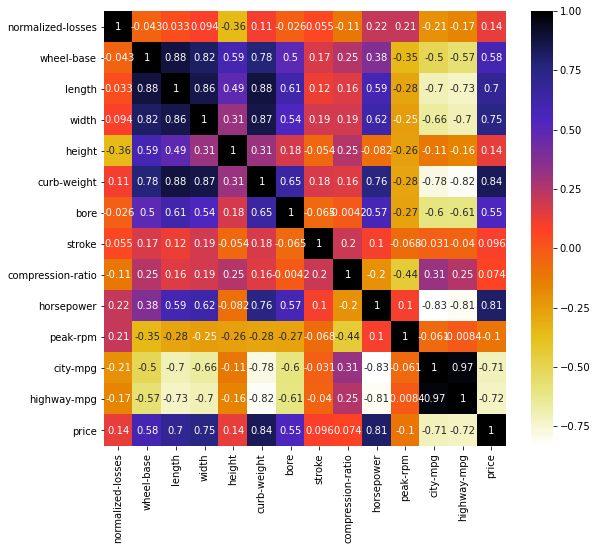

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(9,8))
sns.heatmap(numerical_data.corr(),annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [24]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [25]:
X1=numerical_data.drop("price",axis=1)
y1=numerical_data["price"]

In [26]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(
    X1,
    y1,
    test_size=0.3,
    random_state=0)

X1_train.shape, X1_test.shape

((135, 13), (58, 13))

In [27]:
corr_features1 = correlation(X1_train, 0.80)
len(set(corr_features1))

5

In [28]:
corr_features1

{'city-mpg', 'curb-weight', 'highway-mpg', 'length', 'width'}

**Method 2**

In [29]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from matplotlib import pyplot

In [30]:
from sklearn.model_selection import train_test_split
X2_train, X2_test, y2_train, y2_test = train_test_split(
    X1,
    y1,
    test_size=0.3,
    random_state=0)

In [31]:
X2_train.shape

(135, 13)

In [32]:
# feature selection
def select_features(X_train, y_train, X_test):
	# configure to select all features
	fs = SelectKBest(score_func=f_regression, k=9)
	# learn relationship from training data
	fs.fit(X_train, y_train)
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

Feature 0: 2.847287
Feature 1: 79.461322
Feature 2: 125.073479
Feature 3: 156.655033
Feature 4: 8.995377
Feature 5: 262.941052
Feature 6: 63.668061
Feature 7: 0.339500
Feature 8: 0.172803
Feature 9: 251.227215
Feature 10: 0.729723
Feature 11: 117.240170
Feature 12: 124.105745


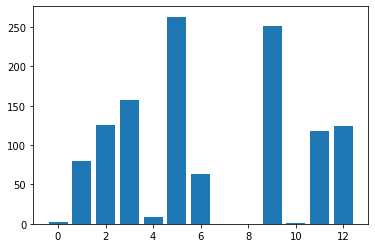

In [33]:
# feature selection
X_train_fs, X_test_fs, fs = select_features(X2_train, y2_train, X2_test)
# what are scores for the features
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

In [34]:
print(fs.get_support())

[False  True  True  True  True  True  True False False  True False  True
  True]


Feature selection using Categorical input data and numerical output data

In [35]:
#label Encoding
# Import label encoder 
from sklearn import preprocessing
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder()


In [36]:
data["make"]= label_encoder.fit_transform(data["make"])
data["fuel-type"]= label_encoder.fit_transform(data["fuel-type"])
data["aspiration"]= label_encoder.fit_transform(data["aspiration"]) 
data["num-of-doors"]= label_encoder.fit_transform(data["num-of-doors"]) 
data["body-style"]= label_encoder.fit_transform(data["body-style"]) 
data["drive-wheels"]= label_encoder.fit_transform(data["drive-wheels"]) 
data["engine-location"]= label_encoder.fit_transform(data["engine-location"]) 
data["engine-type"]= label_encoder.fit_transform(data["engine-type"]) 
data["fuel-system"]= label_encoder.fit_transform(data["fuel-system"]) 

In [37]:
data["num-of-cylinders"]= label_encoder.fit_transform(data["num-of-cylinders"]) 
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,0,1,0,1,0,2,0,88.6,...,130,4,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122,0,1,0,1,0,2,0,88.6,...,130,4,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122,0,1,0,1,2,2,0,94.5,...,152,4,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,1,1,0,0,3,1,0,99.8,...,109,4,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,1,1,0,0,3,0,0,99.4,...,136,4,3.19,3.40,8.0,115,5500,18,22,17450


In [38]:
categorical_data=data[["symboling","make","fuel-type","aspiration","num-of-doors","body-style","drive-wheels","engine-location","engine-type","fuel-system","num-of-cylinders","price"]]

### **ANOVA**

In [39]:
#perform anova test is the predictors are categorical and response is numerical
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [40]:
X3_train,X3_test,y3_train,y3_test=train_test_split(categorical_data.drop("price",axis=1),
                                              data['price'],test_size=0.3,random_state=100)

In [41]:
X3_train.shape

(135, 11)

In [42]:


# feature selection
#def select_features(X_train, y_train, X_test):
	# configure to select all features
#	fvalue_Best = SelectKBest(f_classif, k=8)
#	# learn relationship from training data
#	fvalue_Best.fit(X_train, y_train)
	# transform train input data
#	X_train_fvalue_Best = fvalue_Best.transform(X_train)
	# transform test input data
#	X_test_fvalue_Best = fvalue_Best.transform(X_test)
#	return X_train_fvalue_Best, X_test_fvalue_Best, fvalue_Best

In [43]:
# feature selection
#X_train_fs, X_test_fs, fs = select_features(X3_train, y3_train, X3_test)
# what are scores for the features
#for i in range(len(fvalue_Best.scores_)):
#	print('Feature %d: %f' % (i, fvalue_Best.scores_[i]))
# plot the scores
#pyplot.bar([i for i in range(len(fvalue_Best.scores_))], fvalue_Best.scores_)
#plt.figure(figsize=(9,15))
#pyplot.show()

In [44]:
#print(fvalue_Best.get_support())

In [45]:
fvalue_Best = SelectKBest(f_classif,k=3)
X_kbest = fvalue_Best.fit_transform(X3_train, y3_train)

/opt/conda/envs/Python-3.8-main/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:116: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw


Feature 0: 1.196073
Feature 1: 1.529661
Feature 2: 1.502400
Feature 3: 2.950933
Feature 4: 1.412800
Feature 5: 4.370311
Feature 6: 5.997333
Feature 7: inf
Feature 8: 5.860800
Feature 9: 4.290085
Feature 10: inf


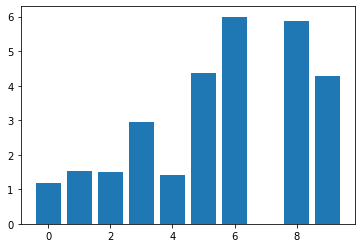

<Figure size 648x1080 with 0 Axes>

In [46]:
for i in range(len(fvalue_Best.scores_)):

  print('Feature %d: %f' % (i, fvalue_Best.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fvalue_Best.scores_))], fvalue_Best.scores_)
plt.figure(figsize=(9,15))
pyplot.show()

In [47]:
print(fvalue_Best.get_support())

[False False False False False False  True  True False False  True]


## Kendall's

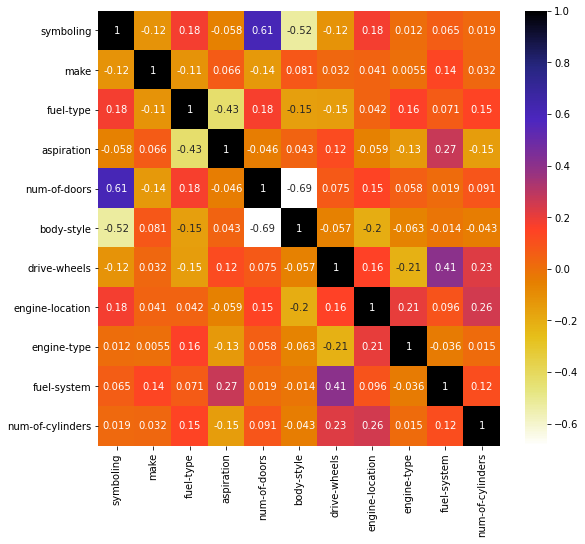

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(9,8))
sns.heatmap(categorical_data.drop("price",axis=1).corr(method="kendall"),annot=True, cmap=plt.cm.CMRmap_r)
plt.show()


In [49]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def kendall_correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr(method="kendall")
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [50]:
X4=categorical_data.drop("price",axis=1)
y4=categorical_data["price"]

In [51]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X4_train, X4_test, y4_train, y4_test = train_test_split(
    X4,
    y4,
    test_size=0.3,
    random_state=0)

In [52]:
corr_features2 = kendall_correlation(X4_train, 0.60)
len(set(corr_features2))
corr_features2

{'body-style', 'num-of-doors'}

# ***Wrapper Method***

Recursive Feature Elimination

In [53]:
X5=data.drop("price",axis=1)
y5=data["price"]

In [54]:
X5_train, X5_test, y5_train, y5_test = train_test_split(
    X5,
    y5,
    test_size=0.3,
    random_state=0)

In [55]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_selection import RFECV
rfc = DecisionTreeRegressor()
rfecv = RFECV(estimator=rfc, step=1, scoring='neg_mean_absolute_error')
rfecv.fit(X5_train,y5_train)

RFECV(estimator=DecisionTreeRegressor(), scoring='neg_mean_absolute_error')

In [56]:
X5_train.shape

(135, 25)

In [57]:
print('Optimal number of features: {}'.format(rfecv.n_features_))

Optimal number of features: 9


In [58]:
print(np.where(rfecv.support_ == False)[0])

X5_train.drop(X5_train.columns[np.where(rfecv.support_ == False)[0]], axis=1, inplace=True)

[ 0  1  3  4  5  6  7  8 10 12 15 17 18 20 22 23]


/opt/conda/envs/Python-3.8-main/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


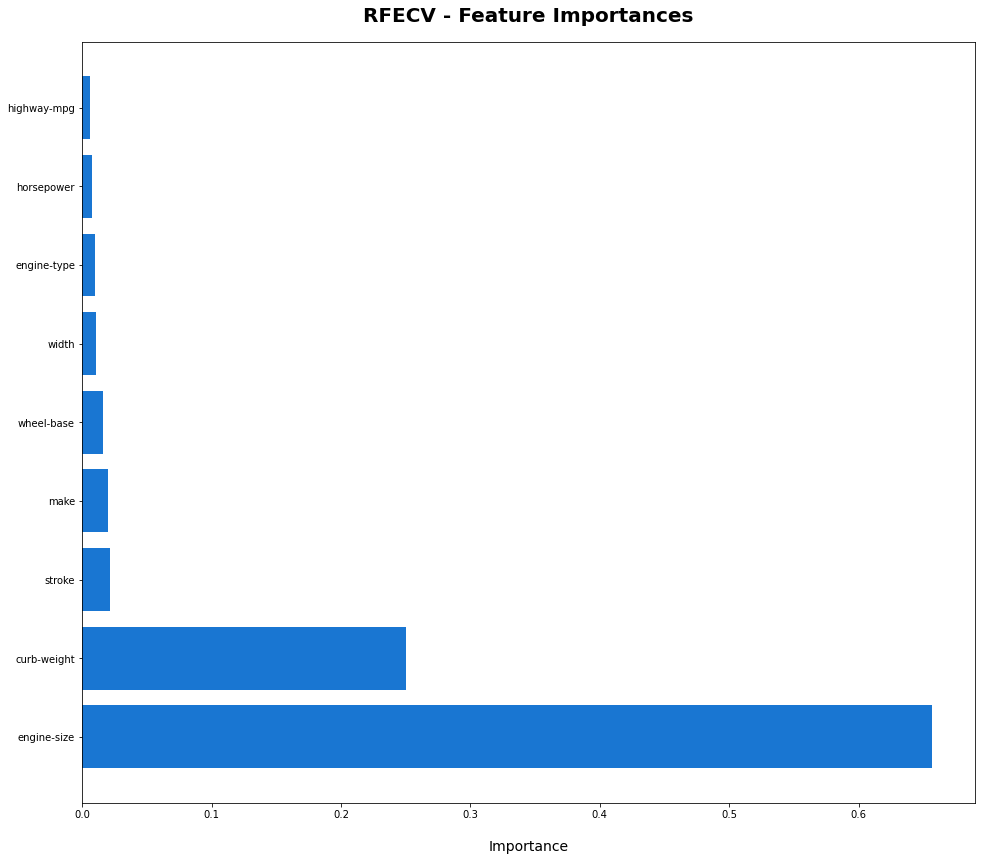

In [59]:
dset = pd.DataFrame()
dset['attr'] = X5_train.columns
dset['importance'] = rfecv.estimator_.feature_importances_

dset = dset.sort_values(by='importance', ascending=False)


plt.figure(figsize=(16, 14))
plt.barh(y=dset['attr'], width=dset['importance'], color='#1976D2')
plt.title('RFECV - Feature Importances', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Importance', fontsize=14, labelpad=20)
plt.show()

## Intrinsic Method

### Decision Tree

In [60]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance

In [61]:
X6=data.drop("price",axis=1)
y6=data["price"]

In [62]:
X6_train, X6_test, y6_train, y6_test = train_test_split(
    X6,
    y6,
    test_size=0.3,
    random_state=0)

In [63]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X6_train, y6_train)

RandomForestRegressor()

In [64]:
rf.feature_importances_

array([9.87641094e-04, 7.01229489e-03, 1.34734051e-02, 1.81137236e-04,
       9.59667801e-04, 2.65776625e-03, 2.06259696e-03, 3.19423568e-03,
       6.51051633e-05, 1.22213315e-02, 1.01275698e-02, 1.13499109e-02,
       4.85646784e-03, 2.90969646e-01, 2.61758503e-03, 1.01983596e-03,
       5.40151766e-01, 4.07359642e-03, 3.99979341e-03, 5.39507515e-03,
       6.07669588e-03, 5.07067140e-02, 4.63182308e-03, 1.54505237e-02,
       5.75781448e-03])

Text(0.5, 0, 'Random Forest Feature Importance')

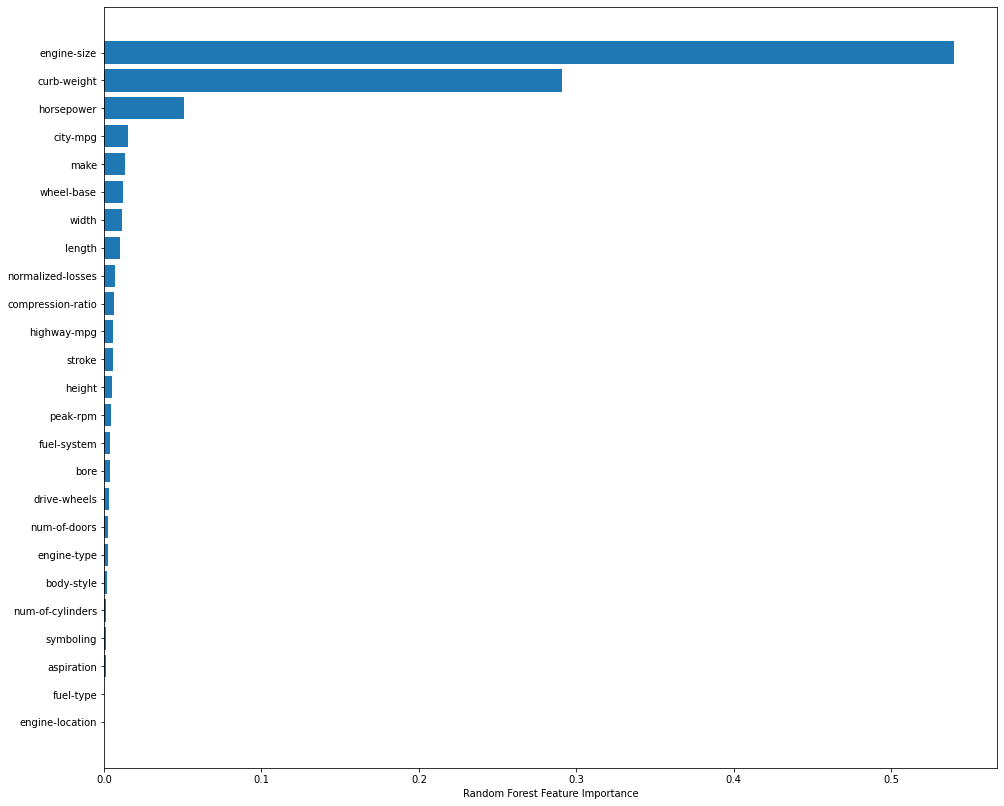

In [65]:
sorted_idx = rf.feature_importances_.argsort()
plt.figure(figsize=(16, 14))
plt.barh(data.columns[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

## Permutation Based Feature Importance

In [66]:
perm_importance = permutation_importance(rf, X6_test, y6_test)

Text(0.5, 0, 'Permutation Importance')

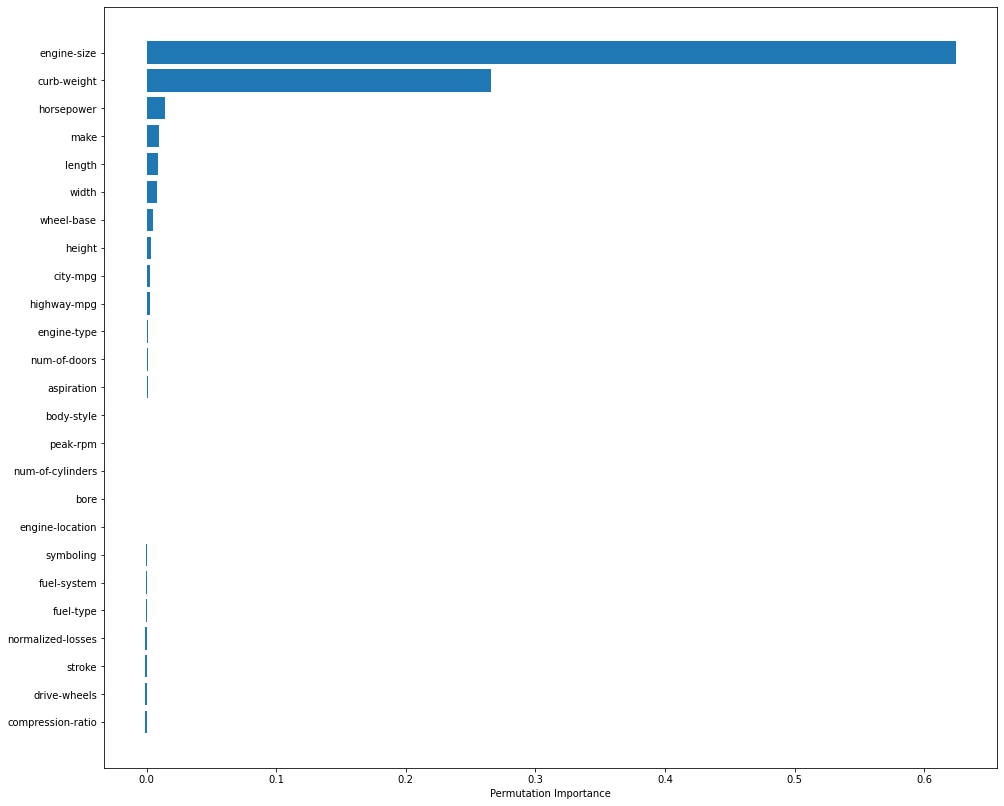

In [67]:
sorted_idx1 = perm_importance.importances_mean.argsort()
plt.figure(figsize=(16, 14))
plt.barh(data.columns[sorted_idx1], perm_importance.importances_mean[sorted_idx1])
plt.xlabel("Permutation Importance")

## Feature Importance Computed with SHAP Values

In [68]:
import shap
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X6_test)

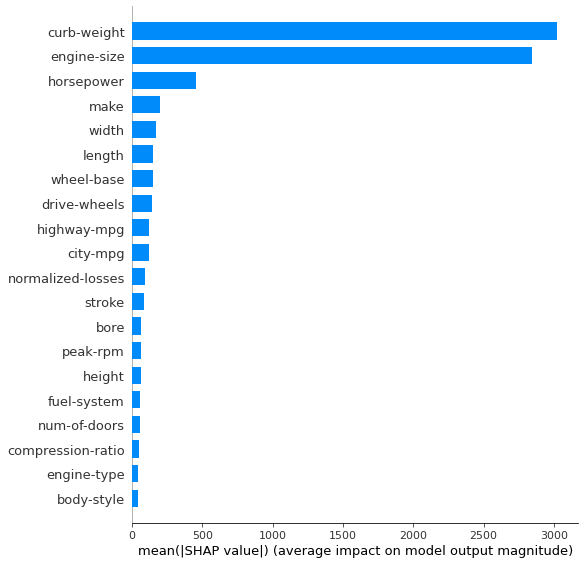

In [69]:
shap.summary_plot(shap_values, X6_test, plot_type="bar")

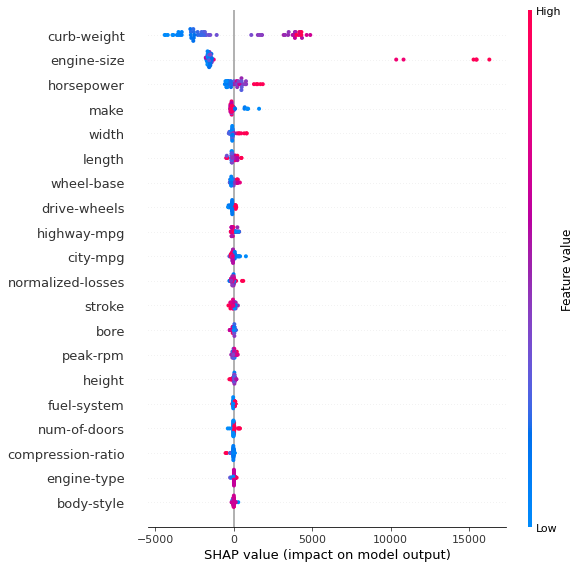

In [70]:
shap.summary_plot(shap_values, X6_test)

Type 2

In [71]:
from sklearn.feature_selection import SelectFromModel

In [72]:
X7=data.drop("price",axis=1)
y7=data["price"]
X7_train, X7_test, y7_train, y7_test = train_test_split(
    X7,
    y7,
    test_size=0.3,
    random_state=0)

In [73]:
sel = SelectFromModel(RandomForestRegressor(n_estimators=100))
sel.fit(X7_train, y7_train)

SelectFromModel(estimator=RandomForestRegressor())

In [74]:
sel.get_support()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False,  True, False,
       False, False, False,  True, False, False, False])

In [75]:
selected_feat= X7_train.columns[(sel.get_support())]
len(selected_feat)

3

In [76]:
print(selected_feat)

Index(['curb-weight', 'engine-size', 'horsepower'], dtype='object')


## Lasso Regression 

In [77]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Lasso

In [78]:
X8=data.drop("price",axis=1)
y8=data["price"]
X8_train, X8_test, y8_train, y8_test = train_test_split(
    X8,
    y8,
    test_size=0.3,
    random_state=0)

In [79]:
pipeline = Pipeline([
                     ('scaler',StandardScaler()),
                     ('model',Lasso())
])

In [80]:
search = GridSearchCV(pipeline,
                      {'model__alpha':np.arange(0.1,100,0.1)},
                      cv = 5, scoring="neg_mean_squared_error",verbose=3
                      )

In [81]:
search.fit(X8_train,y8_train)

Fitting 5 folds for each of 999 candidates, totalling 4995 fits
[CV] model__alpha=0.1 ................................................
[CV] ............ model__alpha=0.1, score=-11705976.509, total=   0.0s
[CV] model__alpha=0.1 ................................................
[CV] ............ model__alpha=0.1, score=-16341655.221, total=   0.0s
[CV] model__alpha=0.1 ................................................
[CV] ............ model__alpha=0.1, score=-19068097.164, total=   0.0s
[CV] model__alpha=0.1 ................................................
[CV] ............ model__alpha=0.1, score=-11267734.875, total=   0.0s
[CV] model__alpha=0.1 ................................................
[CV] ............. model__alpha=0.1, score=-4221476.968, total=   0.0s
[CV] model__alpha=0.2 ................................................
[CV] ............ model__alpha=0.2, score=-11695250.860, total=   0.0s
[CV] model__alpha=0.2 ................................................
[CV] ........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
Objective did not converge. You might want to increase the number of iterations. Duality gap: 4090393.7201752663, tolerance: 639212.6594916667
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
Objective did not converge. You might want to increase the number of iterations. Duality gap: 9932257.525751114, tolerance: 642963.213351852
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
Objective did not converge. You might want to increase the number of iterations. Duality gap: 1870160.9414066076, tolerance: 763752.7118666667
Objective did not converge. You might want to increase the number of iterations. Duality gap: 1164233.274842143, tolerance: 639212.6594916667
Objective did not converge. You might want to increase the number of iterations. Duality gap: 2991533.125080645, tolerance: 642963.213351852
Objective did not converge. You might want to inc

[CV]  model__alpha=0.30000000000000004, score=-19010859.941, total=   0.0s
[CV] model__alpha=0.30000000000000004 ................................
[CV]  model__alpha=0.30000000000000004, score=-11250117.894, total=   0.0s
[CV] model__alpha=0.30000000000000004 ................................
[CV]  model__alpha=0.30000000000000004, score=-4208659.403, total=   0.0s
[CV] model__alpha=0.4 ................................................
[CV] ............ model__alpha=0.4, score=-11673588.746, total=   0.0s
[CV] model__alpha=0.4 ................................................
[CV] ............ model__alpha=0.4, score=-16358181.365, total=   0.0s
[CV] model__alpha=0.4 ................................................
[CV] ............ model__alpha=0.4, score=-18982252.155, total=   0.0s
[CV] model__alpha=0.4 ................................................
[CV] ............ model__alpha=0.4, score=-11241324.766, total=   0.0s
[CV] model__alpha=0.4 ............................................

Objective did not converge. You might want to increase the number of iterations. Duality gap: 810883.2751117349, tolerance: 642963.213351852


[CV] ............ model__alpha=0.6, score=-11651861.426, total=   0.0s
[CV] model__alpha=0.6 ................................................
[CV] ............ model__alpha=0.6, score=-16369655.783, total=   0.0s
[CV] model__alpha=0.6 ................................................
[CV] ............ model__alpha=0.6, score=-18925061.087, total=   0.0s
[CV] model__alpha=0.6 ................................................
[CV] ............ model__alpha=0.6, score=-11223771.512, total=   0.0s
[CV] model__alpha=0.6 ................................................
[CV] ............. model__alpha=0.6, score=-4189581.151, total=   0.0s
[CV] model__alpha=0.7000000000000001 .................................
[CV]  model__alpha=0.7000000000000001, score=-11641056.688, total=   0.0s
[CV] model__alpha=0.7000000000000001 .................................
[CV]  model__alpha=0.7000000000000001, score=-16375507.423, total=   0.0s
[CV] model__alpha=0.7000000000000001 .................................


[CV]  model__alpha=1.8000000000000003, score=-18583863.609, total=   0.0s
[CV] model__alpha=1.8000000000000003 .................................
[CV]  model__alpha=1.8000000000000003, score=-11119373.588, total=   0.0s
[CV] model__alpha=1.8000000000000003 .................................
[CV]  model__alpha=1.8000000000000003, score=-4115760.612, total=   0.0s
[CV] model__alpha=1.9000000000000001 .................................
[CV]  model__alpha=1.9000000000000001, score=-11513788.986, total=   0.0s
[CV] model__alpha=1.9000000000000001 .................................
[CV]  model__alpha=1.9000000000000001, score=-16450550.425, total=   0.0s
[CV] model__alpha=1.9000000000000001 .................................
[CV]  model__alpha=1.9000000000000001, score=-18555716.864, total=   0.0s
[CV] model__alpha=1.9000000000000001 .................................
[CV]  model__alpha=1.9000000000000001, score=-11110746.928, total=   0.0s
[CV] model__alpha=1.9000000000000001 ....................

[CV]  model__alpha=3.0000000000000004, score=-11401053.902, total=   0.0s
[CV] model__alpha=3.0000000000000004 .................................
[CV]  model__alpha=3.0000000000000004, score=-16527078.738, total=   0.0s
[CV] model__alpha=3.0000000000000004 .................................
[CV]  model__alpha=3.0000000000000004, score=-18370520.317, total=   0.0s
[CV] model__alpha=3.0000000000000004 .................................
[CV]  model__alpha=3.0000000000000004, score=-11016634.171, total=   0.0s
[CV] model__alpha=3.0000000000000004 .................................
[CV]  model__alpha=3.0000000000000004, score=-4044721.797, total=   0.0s
[CV] model__alpha=3.1 ................................................
[CV] ............ model__alpha=3.1, score=-11391015.642, total=   0.0s
[CV] model__alpha=3.1 ................................................
[CV] ............ model__alpha=3.1, score=-16534394.433, total=   0.0s
[CV] model__alpha=3.1 .........................................

[CV] ............ model__alpha=4.1, score=-10923975.888, total=   0.0s
[CV] model__alpha=4.1 ................................................
[CV] ............. model__alpha=4.1, score=-3981220.263, total=   0.0s
[CV] model__alpha=4.2 ................................................
[CV] ............ model__alpha=4.2, score=-11276901.361, total=   0.0s
[CV] model__alpha=4.2 ................................................
[CV] ............ model__alpha=4.2, score=-16590966.517, total=   0.0s
[CV] model__alpha=4.2 ................................................
[CV] ............ model__alpha=4.2, score=-18224223.760, total=   0.0s
[CV] model__alpha=4.2 ................................................
[CV] ............ model__alpha=4.2, score=-10915634.040, total=   0.0s
[CV] model__alpha=4.2 ................................................
[CV] ............. model__alpha=4.2, score=-3975588.477, total=   0.0s
[CV] model__alpha=4.3 ................................................
[CV] .

[CV] ............ model__alpha=5.3, score=-18091601.537, total=   0.0s
[CV] model__alpha=5.3 ................................................
[CV] ............ model__alpha=5.3, score=-10824580.385, total=   0.0s
[CV] model__alpha=5.3 ................................................
[CV] ............. model__alpha=5.3, score=-3915252.424, total=   0.0s
[CV] model__alpha=5.4 ................................................
[CV] ............ model__alpha=5.4, score=-11146147.029, total=   0.0s
[CV] model__alpha=5.4 ................................................
[CV] ............ model__alpha=5.4, score=-16596068.868, total=   0.0s
[CV] model__alpha=5.4 ................................................
[CV] ............ model__alpha=5.4, score=-18078937.472, total=   0.0s
[CV] model__alpha=5.4 ................................................
[CV] ............ model__alpha=5.4, score=-10816378.273, total=   0.0s
[CV] model__alpha=5.4 ................................................
[CV] .

[CV] ............ model__alpha=6.5, score=-10721122.820, total=   0.0s
[CV] model__alpha=6.5 ................................................
[CV] ............. model__alpha=6.5, score=-3852706.111, total=   0.0s
[CV] model__alpha=6.6 ................................................
[CV] ............ model__alpha=6.6, score=-11064714.669, total=   0.0s
[CV] model__alpha=6.6 ................................................
[CV] ............ model__alpha=6.6, score=-16573478.915, total=   0.0s
[CV] model__alpha=6.6 ................................................
[CV] ............ model__alpha=6.6, score=-17928988.163, total=   0.0s
[CV] model__alpha=6.6 ................................................
[CV] ............ model__alpha=6.6, score=-10711852.837, total=   0.0s
[CV] model__alpha=6.6 ................................................
[CV] ............. model__alpha=6.6, score=-3847651.060, total=   0.0s
[CV] model__alpha=6.7 ................................................
[CV] .

[CV] ............ model__alpha=7.8, score=-10985946.656, total=   0.0s
[CV] model__alpha=7.8 ................................................
[CV] ............ model__alpha=7.8, score=-16550330.498, total=   0.0s
[CV] model__alpha=7.8 ................................................
[CV] ............ model__alpha=7.8, score=-17783392.488, total=   0.0s
[CV] model__alpha=7.8 ................................................
[CV] ............ model__alpha=7.8, score=-10594165.154, total=   0.0s
[CV] model__alpha=7.8 ................................................
[CV] ............. model__alpha=7.8, score=-3788781.437, total=   0.0s
[CV] model__alpha=7.9 ................................................
[CV] ............ model__alpha=7.9, score=-10979538.757, total=   0.0s
[CV] model__alpha=7.9 ................................................
[CV] ............ model__alpha=7.9, score=-16548462.028, total=   0.0s
[CV] model__alpha=7.9 ................................................
[CV] .

[CV] ............ model__alpha=9.0, score=-10457996.830, total=   0.0s
[CV] model__alpha=9.0 ................................................
[CV] ............. model__alpha=9.0, score=-3733309.833, total=   0.0s
[CV] model__alpha=9.1 ................................................
[CV] ............ model__alpha=9.1, score=-10903753.377, total=   0.0s
[CV] model__alpha=9.1 ................................................
[CV] ............ model__alpha=9.1, score=-16526108.314, total=   0.0s
[CV] model__alpha=9.1 ................................................
[CV] ............ model__alpha=9.1, score=-17623972.600, total=   0.0s
[CV] model__alpha=9.1 ................................................
[CV] ............ model__alpha=9.1, score=-10446688.404, total=   0.0s
[CV] model__alpha=9.1 ................................................
[CV] ............. model__alpha=9.1, score=-3728842.164, total=   0.0s
[CV] model__alpha=9.2 ................................................
[CV] .

[CV] ........... model__alpha=10.3, score=-17477603.123, total=   0.0s
[CV] model__alpha=10.3 ...............................................
[CV] ........... model__alpha=10.3, score=-10313285.218, total=   0.0s
[CV] model__alpha=10.3 ...............................................
[CV] ............ model__alpha=10.3, score=-3677031.324, total=   0.0s
[CV] model__alpha=10.4 ...............................................
[CV] ........... model__alpha=10.4, score=-10824638.886, total=   0.0s
[CV] model__alpha=10.4 ...............................................
[CV] ........... model__alpha=10.4, score=-16502933.151, total=   0.0s
[CV] model__alpha=10.4 ...............................................
[CV] ........... model__alpha=10.4, score=-17465541.651, total=   0.0s
[CV] model__alpha=10.4 ...............................................
[CV] ........... model__alpha=10.4, score=-10302418.489, total=   0.0s
[CV] model__alpha=10.4 ...............................................
[CV] .

[CV] ........... model__alpha=11.6, score=-10166765.196, total=   0.0s
[CV] model__alpha=11.6 ...............................................
[CV] ............ model__alpha=11.6, score=-3624704.246, total=   0.0s
[CV] model__alpha=11.700000000000001 .................................
[CV]  model__alpha=11.700000000000001, score=-10752762.379, total=   0.0s
[CV] model__alpha=11.700000000000001 .................................
[CV]  model__alpha=11.700000000000001, score=-16480542.265, total=   0.0s
[CV] model__alpha=11.700000000000001 .................................
[CV]  model__alpha=11.700000000000001, score=-17308133.593, total=   0.0s
[CV] model__alpha=11.700000000000001 .................................
[CV]  model__alpha=11.700000000000001, score=-10155427.530, total=   0.0s
[CV] model__alpha=11.700000000000001 .................................
[CV]  model__alpha=11.700000000000001, score=-3620844.662, total=   0.0s
[CV] model__alpha=11.8 ........................................

[CV] ........... model__alpha=12.9, score=-17164047.973, total=   0.0s
[CV] model__alpha=12.9 ...............................................
[CV] ........... model__alpha=12.9, score=-10020927.150, total=   0.0s
[CV] model__alpha=12.9 ...............................................
[CV] ............ model__alpha=12.9, score=-3576334.372, total=   0.0s
[CV] model__alpha=13.0 ...............................................
[CV] ........... model__alpha=13.0, score=-10685078.535, total=   0.0s
[CV] model__alpha=13.0 ...............................................
[CV] ........... model__alpha=13.0, score=-16459042.225, total=   0.0s
[CV] model__alpha=13.0 ...............................................
[CV] ........... model__alpha=13.0, score=-17152094.673, total=   0.0s
[CV] model__alpha=13.0 ...............................................
[CV] ........... model__alpha=13.0, score=-10009847.548, total=   0.0s
[CV] model__alpha=13.0 ...............................................
[CV] .

[CV] ........... model__alpha=14.3, score=-10618394.182, total=   0.0s
[CV] model__alpha=14.3 ...............................................
[CV] ........... model__alpha=14.3, score=-16438518.685, total=   0.0s
[CV] model__alpha=14.3 ...............................................
[CV] ........... model__alpha=14.3, score=-16997175.190, total=   0.0s
[CV] model__alpha=14.3 ...............................................
[CV] ............ model__alpha=14.3, score=-9867010.828, total=   0.0s
[CV] model__alpha=14.3 ...............................................
[CV] ............ model__alpha=14.3, score=-3526633.373, total=   0.0s
[CV] model__alpha=14.4 ...............................................
[CV] ........... model__alpha=14.4, score=-10613314.145, total=   0.0s
[CV] model__alpha=14.4 ...............................................
[CV] ........... model__alpha=14.4, score=-16437022.724, total=   0.0s
[CV] model__alpha=14.4 ...............................................
[CV] .

[CV] ........... model__alpha=15.6, score=-16844148.356, total=   0.0s
[CV] model__alpha=15.6 ...............................................
[CV] ............ model__alpha=15.6, score=-9727203.530, total=   0.0s
[CV] model__alpha=15.6 ...............................................
[CV] ............ model__alpha=15.6, score=-3485923.849, total=   0.0s
[CV] model__alpha=15.700000000000001 .................................
[CV]  model__alpha=15.700000000000001, score=-10553480.228, total=   0.0s
[CV] model__alpha=15.700000000000001 .................................
[CV]  model__alpha=15.700000000000001, score=-16417456.009, total=   0.0s
[CV] model__alpha=15.700000000000001 .................................
[CV]  model__alpha=15.700000000000001, score=-16832559.267, total=   0.0s
[CV] model__alpha=15.700000000000001 .................................
[CV]  model__alpha=15.700000000000001, score=-9716607.217, total=   0.0s
[CV] model__alpha=15.700000000000001 .............................

[CV]  model__alpha=17.000000000000004, score=-10496797.973, total=   0.0s
[CV] model__alpha=17.000000000000004 .................................
[CV]  model__alpha=17.000000000000004, score=-16398681.789, total=   0.0s
[CV] model__alpha=17.000000000000004 .................................
[CV]  model__alpha=17.000000000000004, score=-16681662.180, total=   0.0s
[CV] model__alpha=17.000000000000004 .................................
[CV]  model__alpha=17.000000000000004, score=-9580511.965, total=   0.0s
[CV] model__alpha=17.000000000000004 .................................
[CV]  model__alpha=17.000000000000004, score=-3442991.116, total=   0.0s
[CV] model__alpha=17.1 ...............................................
[CV] ........... model__alpha=17.1, score=-10492504.479, total=   0.0s
[CV] model__alpha=17.1 ...............................................
[CV] ........... model__alpha=17.1, score=-16397331.362, total=   0.0s
[CV] model__alpha=17.1 .........................................

[CV] ........... model__alpha=18.3, score=-16533942.716, total=   0.0s
[CV] model__alpha=18.3 ...............................................
[CV] ............ model__alpha=18.3, score=-9447342.257, total=   0.0s
[CV] model__alpha=18.3 ...............................................
[CV] ............ model__alpha=18.3, score=-3403910.240, total=   0.0s
[CV] model__alpha=18.400000000000002 .................................
[CV]  model__alpha=18.400000000000002, score=-10438265.339, total=   0.0s
[CV] model__alpha=18.400000000000002 .................................
[CV]  model__alpha=18.400000000000002, score=-16380406.372, total=   0.0s
[CV] model__alpha=18.400000000000002 .................................
[CV]  model__alpha=18.400000000000002, score=-16522763.996, total=   0.0s
[CV] model__alpha=18.400000000000002 .................................
[CV]  model__alpha=18.400000000000002, score=-9437280.785, total=   0.0s
[CV] model__alpha=18.400000000000002 .............................

[CV] ........... model__alpha=19.6, score=-16389234.886, total=   0.0s
[CV] model__alpha=19.6 ...............................................
[CV] ............ model__alpha=19.6, score=-9317207.275, total=   0.0s
[CV] model__alpha=19.6 ...............................................
[CV] ............ model__alpha=19.6, score=-3367422.033, total=   0.0s
[CV] model__alpha=19.700000000000003 .................................
[CV]  model__alpha=19.700000000000003, score=-10386214.038, total=   0.0s
[CV] model__alpha=19.700000000000003 .................................
[CV]  model__alpha=19.700000000000003, score=-16371365.214, total=   0.0s
[CV] model__alpha=19.700000000000003 .................................
[CV]  model__alpha=19.700000000000003, score=-16378252.695, total=   0.0s
[CV] model__alpha=19.700000000000003 .................................
[CV]  model__alpha=19.700000000000003, score=-9307321.481, total=   0.0s
[CV] model__alpha=19.700000000000003 .............................

[CV]  model__alpha=20.900000000000002, score=-9189886.551, total=   0.0s
[CV] model__alpha=20.900000000000002 .................................
[CV]  model__alpha=20.900000000000002, score=-3340467.146, total=   0.0s
[CV] model__alpha=21.000000000000004 .................................
[CV]  model__alpha=21.000000000000004, score=-10336402.311, total=   0.0s
[CV] model__alpha=21.000000000000004 .................................
[CV]  model__alpha=21.000000000000004, score=-16356403.813, total=   0.0s
[CV] model__alpha=21.000000000000004 .................................
[CV]  model__alpha=21.000000000000004, score=-16236516.052, total=   0.0s
[CV] model__alpha=21.000000000000004 .................................
[CV]  model__alpha=21.000000000000004, score=-9180156.990, total=   0.0s
[CV] model__alpha=21.000000000000004 .................................
[CV]  model__alpha=21.000000000000004, score=-3338437.440, total=   0.0s
[CV] model__alpha=21.1 .....................................

[CV]  model__alpha=22.300000000000004, score=-10288762.319, total=   0.0s
[CV] model__alpha=22.300000000000004 .................................
[CV]  model__alpha=22.300000000000004, score=-16334005.018, total=   0.0s
[CV] model__alpha=22.300000000000004 .................................
[CV]  model__alpha=22.300000000000004, score=-16097567.579, total=   0.0s
[CV] model__alpha=22.300000000000004 .................................
[CV]  model__alpha=22.300000000000004, score=-9057477.781, total=   0.0s
[CV] model__alpha=22.300000000000004 .................................
[CV]  model__alpha=22.300000000000004, score=-3312232.182, total=   0.0s
[CV] model__alpha=22.400000000000002 .................................
[CV]  model__alpha=22.400000000000002, score=-10285163.907, total=   0.0s
[CV] model__alpha=22.400000000000002 .................................
[CV]  model__alpha=22.400000000000002, score=-16332181.684, total=   0.0s
[CV] model__alpha=22.400000000000002 .....................

[CV] ........... model__alpha=23.6, score=-10241931.110, total=   0.0s
[CV] model__alpha=23.6 ...............................................
[CV] ........... model__alpha=23.6, score=-16308242.640, total=   0.0s
[CV] model__alpha=23.6 ...............................................
[CV] ........... model__alpha=23.6, score=-15961379.624, total=   0.0s
[CV] model__alpha=23.6 ...............................................
[CV] ............ model__alpha=23.6, score=-8937604.132, total=   0.0s
[CV] model__alpha=23.6 ...............................................
[CV] ............ model__alpha=23.6, score=-3287002.382, total=   0.0s
[CV] model__alpha=23.700000000000003 .................................
[CV]  model__alpha=23.700000000000003, score=-10241091.350, total=   0.0s
[CV] model__alpha=23.700000000000003 .................................
[CV]  model__alpha=23.700000000000003, score=-16306179.055, total=   0.0s
[CV] model__alpha=23.700000000000003 .................................


[CV]  model__alpha=24.900000000000002, score=-15827771.325, total=   0.0s
[CV] model__alpha=24.900000000000002 .................................
[CV]  model__alpha=24.900000000000002, score=-8820478.762, total=   0.0s
[CV] model__alpha=24.900000000000002 .................................
[CV]  model__alpha=24.900000000000002, score=-3262461.350, total=   0.0s
[CV] model__alpha=25.000000000000004 .................................
[CV]  model__alpha=25.000000000000004, score=-10247652.760, total=   0.0s
[CV] model__alpha=25.000000000000004 .................................
[CV]  model__alpha=25.000000000000004, score=-16280639.797, total=   0.0s
[CV] model__alpha=25.000000000000004 .................................
[CV]  model__alpha=25.000000000000004, score=-15817574.848, total=   0.0s
[CV] model__alpha=25.000000000000004 .................................
[CV]  model__alpha=25.000000000000004, score=-8811623.058, total=   0.0s
[CV] model__alpha=25.000000000000004 ......................

[CV]  model__alpha=26.300000000000004, score=-10267245.720, total=   0.0s
[CV] model__alpha=26.300000000000004 .................................
[CV]  model__alpha=26.300000000000004, score=-16253308.388, total=   0.0s
[CV] model__alpha=26.300000000000004 .................................
[CV]  model__alpha=26.300000000000004, score=-15686752.226, total=   0.0s
[CV] model__alpha=26.300000000000004 .................................
[CV]  model__alpha=26.300000000000004, score=-8697462.687, total=   0.0s
[CV] model__alpha=26.300000000000004 .................................
[CV]  model__alpha=26.300000000000004, score=-3236811.445, total=   0.0s
[CV] model__alpha=26.400000000000002 .................................
[CV]  model__alpha=26.400000000000002, score=-10268744.480, total=   0.0s
[CV] model__alpha=26.400000000000002 .................................
[CV]  model__alpha=26.400000000000002, score=-16250478.964, total=   0.0s
[CV] model__alpha=26.400000000000002 .....................

[CV] ............ model__alpha=27.6, score=-3213659.220, total=   0.0s
[CV] model__alpha=27.700000000000003 .................................
[CV]  model__alpha=27.700000000000003, score=-10288995.995, total=   0.0s
[CV] model__alpha=27.700000000000003 .................................
[CV]  model__alpha=27.700000000000003, score=-16223884.016, total=   0.0s
[CV] model__alpha=27.700000000000003 .................................
[CV]  model__alpha=27.700000000000003, score=-15548460.424, total=   0.0s
[CV] model__alpha=27.700000000000003 .................................
[CV]  model__alpha=27.700000000000003, score=-8577305.611, total=   0.0s
[CV] model__alpha=27.700000000000003 .................................
[CV]  model__alpha=27.700000000000003, score=-3211906.593, total=   0.0s
[CV] model__alpha=27.800000000000004 .................................
[CV]  model__alpha=27.800000000000004, score=-10290543.949, total=   0.0s
[CV] model__alpha=27.800000000000004 ........................

[CV]  model__alpha=28.800000000000004, score=-16204442.488, total=   0.0s
[CV] model__alpha=28.800000000000004 .................................
[CV]  model__alpha=28.800000000000004, score=-15441866.862, total=   0.0s
[CV] model__alpha=28.800000000000004 .................................
[CV]  model__alpha=28.800000000000004, score=-8485149.698, total=   0.0s
[CV] model__alpha=28.800000000000004 .................................
[CV]  model__alpha=28.800000000000004, score=-3192836.899, total=   0.0s
[CV] model__alpha=28.900000000000002 .................................
[CV]  model__alpha=28.900000000000002, score=-10298949.060, total=   0.0s
[CV] model__alpha=28.900000000000002 .................................
[CV]  model__alpha=28.900000000000002, score=-16203599.378, total=   0.0s
[CV] model__alpha=28.900000000000002 .................................
[CV]  model__alpha=28.900000000000002, score=-15432232.996, total=   0.0s
[CV] model__alpha=28.900000000000002 .....................

[CV] ........... model__alpha=30.1, score=-10308458.982, total=   0.0s
[CV] model__alpha=30.1 ...............................................
[CV] ........... model__alpha=30.1, score=-16194465.882, total=   0.0s
[CV] model__alpha=30.1 ...............................................
[CV] ........... model__alpha=30.1, score=-15313240.919, total=   0.0s
[CV] model__alpha=30.1 ...............................................
[CV] ............ model__alpha=30.1, score=-8378884.979, total=   0.0s
[CV] model__alpha=30.1 ...............................................
[CV] ............ model__alpha=30.1, score=-3170728.393, total=   0.0s
[CV] model__alpha=30.200000000000003 .................................
[CV]  model__alpha=30.200000000000003, score=-10309168.237, total=   0.0s
[CV] model__alpha=30.200000000000003 .................................
[CV]  model__alpha=30.200000000000003, score=-16193958.073, total=   0.0s
[CV] model__alpha=30.200000000000003 .................................


[CV]  model__alpha=31.200000000000003, score=-3151704.659, total=   0.0s
[CV] model__alpha=31.300000000000004 .................................
[CV]  model__alpha=31.300000000000004, score=-10318186.907, total=   0.0s
[CV] model__alpha=31.300000000000004 .................................
[CV]  model__alpha=31.300000000000004, score=-16184795.233, total=   0.0s
[CV] model__alpha=31.300000000000004 .................................
[CV]  model__alpha=31.300000000000004, score=-15192608.743, total=   0.0s
[CV] model__alpha=31.300000000000004 .................................
[CV]  model__alpha=31.300000000000004, score=-8283116.803, total=   0.0s
[CV] model__alpha=31.300000000000004 .................................
[CV]  model__alpha=31.300000000000004, score=-3150073.588, total=   0.0s
[CV] model__alpha=31.400000000000002 .................................
[CV]  model__alpha=31.400000000000002, score=-10319096.181, total=   0.0s
[CV] model__alpha=31.400000000000002 ......................

[CV] ............ model__alpha=32.5, score=-3128198.718, total=   0.0s
[CV] model__alpha=32.6 ...............................................
[CV] ........... model__alpha=32.6, score=-10328919.451, total=   0.0s
[CV] model__alpha=32.6 ...............................................
[CV] ........... model__alpha=32.6, score=-16174444.079, total=   0.0s
[CV] model__alpha=32.6 ...............................................
[CV] ........... model__alpha=32.6, score=-15075875.461, total=   0.0s
[CV] model__alpha=32.6 ...............................................
[CV] ............ model__alpha=32.6, score=-8182360.814, total=   0.0s
[CV] model__alpha=32.6 ...............................................
[CV] ............ model__alpha=32.6, score=-3126188.298, total=   0.0s
[CV] model__alpha=32.7 ...............................................
[CV] ........... model__alpha=32.7, score=-10329830.715, total=   0.0s
[CV] model__alpha=32.7 ...............................................
[CV] .

[CV] ............ model__alpha=33.7, score=-3103975.779, total=   0.0s
[CV] model__alpha=33.800000000000004 .................................
[CV]  model__alpha=33.800000000000004, score=-10339240.759, total=   0.0s
[CV] model__alpha=33.800000000000004 .................................
[CV]  model__alpha=33.800000000000004, score=-16165387.014, total=   0.0s
[CV] model__alpha=33.800000000000004 .................................
[CV]  model__alpha=33.800000000000004, score=-14970622.985, total=   0.0s
[CV] model__alpha=33.800000000000004 .................................
[CV]  model__alpha=33.800000000000004, score=-8091895.974, total=   0.0s
[CV] model__alpha=33.800000000000004 .................................
[CV]  model__alpha=33.800000000000004, score=-3101928.280, total=   0.0s
[CV] model__alpha=33.900000000000006 .................................
[CV]  model__alpha=33.900000000000006, score=-10339942.569, total=   0.0s
[CV] model__alpha=33.900000000000006 ........................

[CV]  model__alpha=34.900000000000006, score=-3080236.315, total=   0.0s
[CV] model__alpha=35.0 ...............................................
[CV] ........... model__alpha=35.0, score=-10349486.316, total=   0.0s
[CV] model__alpha=35.0 ...............................................
[CV] ........... model__alpha=35.0, score=-16156288.167, total=   0.0s
[CV] model__alpha=35.0 ...............................................
[CV] ........... model__alpha=35.0, score=-14902404.935, total=   0.0s
[CV] model__alpha=35.0 ...............................................
[CV] ............ model__alpha=35.0, score=-8003762.646, total=   0.0s
[CV] model__alpha=35.0 ...............................................
[CV] ............ model__alpha=35.0, score=-3078303.205, total=   0.0s
[CV] model__alpha=35.1 ...............................................
[CV] ........... model__alpha=35.1, score=-10350420.450, total=   0.0s
[CV] model__alpha=35.1 ...............................................
[CV]

[CV] ............ model__alpha=36.1, score=-3057836.682, total=   0.0s
[CV] model__alpha=36.2 ...............................................
[CV] ........... model__alpha=36.2, score=-10360118.909, total=   0.0s
[CV] model__alpha=36.2 ...............................................
[CV] ........... model__alpha=36.2, score=-16147468.013, total=   0.0s
[CV] model__alpha=36.2 ...............................................
[CV] ........... model__alpha=36.2, score=-14826274.381, total=   0.0s
[CV] model__alpha=36.2 ...............................................
[CV] ............ model__alpha=36.2, score=-7917923.555, total=   0.0s
[CV] model__alpha=36.2 ...............................................
[CV] ............ model__alpha=36.2, score=-3056716.400, total=   0.0s
[CV] model__alpha=36.300000000000004 .................................
[CV]  model__alpha=36.300000000000004, score=-10361066.378, total=   0.0s
[CV] model__alpha=36.300000000000004 .................................
[CV

[CV]  model__alpha=37.400000000000006, score=-14751351.977, total=   0.0s
[CV] model__alpha=37.400000000000006 .................................
[CV]  model__alpha=37.400000000000006, score=-7834729.799, total=   0.0s
[CV] model__alpha=37.400000000000006 .................................
[CV]  model__alpha=37.400000000000006, score=-3038106.140, total=   0.0s
[CV] model__alpha=37.5 ...............................................
[CV] ........... model__alpha=37.5, score=-10371909.456, total=   0.0s
[CV] model__alpha=37.5 ...............................................
[CV] ........... model__alpha=37.5, score=-16138101.996, total=   0.0s
[CV] model__alpha=37.5 ...............................................
[CV] ........... model__alpha=37.5, score=-14745074.784, total=   0.0s
[CV] model__alpha=37.5 ...............................................
[CV] ............ model__alpha=37.5, score=-7827924.856, total=   0.0s
[CV] model__alpha=37.5 ...............................................

[CV] ............ model__alpha=38.6, score=-7753817.955, total=   0.0s
[CV] model__alpha=38.6 ...............................................
[CV] ............ model__alpha=38.6, score=-3020124.607, total=   0.0s
[CV] model__alpha=38.7 ...............................................
[CV] ........... model__alpha=38.7, score=-10382781.464, total=   0.0s
[CV] model__alpha=38.7 ...............................................
[CV] ........... model__alpha=38.7, score=-16129903.322, total=   0.0s
[CV] model__alpha=38.7 ...............................................
[CV] ........... model__alpha=38.7, score=-14671391.055, total=   0.0s
[CV] model__alpha=38.7 ...............................................
[CV] ............ model__alpha=38.7, score=-7747219.628, total=   0.0s
[CV] model__alpha=38.7 ...............................................
[CV] ............ model__alpha=38.7, score=-3018592.399, total=   0.0s
[CV] model__alpha=38.800000000000004 .................................
[CV]  

[CV]  model__alpha=39.900000000000006, score=-16121944.020, total=   0.0s
[CV] model__alpha=39.900000000000006 .................................
[CV]  model__alpha=39.900000000000006, score=-14597914.019, total=   0.0s
[CV] model__alpha=39.900000000000006 .................................
[CV]  model__alpha=39.900000000000006, score=-7669240.557, total=   0.0s
[CV] model__alpha=39.900000000000006 .................................
[CV]  model__alpha=39.900000000000006, score=-3000936.239, total=   0.0s
[CV] model__alpha=40.00000000000001 ..................................
[CV]  model__alpha=40.00000000000001, score=-10396796.120, total=   0.0s
[CV] model__alpha=40.00000000000001 ..................................
[CV]  model__alpha=40.00000000000001, score=-16121285.682, total=   0.0s
[CV] model__alpha=40.00000000000001 ..................................
[CV]  model__alpha=40.00000000000001, score=-14591965.239, total=   0.0s
[CV] model__alpha=40.00000000000001 .........................

[CV] ........... model__alpha=41.1, score=-16114258.525, total=   0.0s
[CV] model__alpha=41.1 ...............................................
[CV] ........... model__alpha=41.1, score=-14524951.831, total=   0.0s
[CV] model__alpha=41.1 ...............................................
[CV] ............ model__alpha=41.1, score=-7593609.567, total=   0.0s
[CV] model__alpha=41.1 ...............................................
[CV] ............ model__alpha=41.1, score=-2983410.146, total=   0.0s
[CV] model__alpha=41.2 ...............................................
[CV] ........... model__alpha=41.2, score=-10411302.682, total=   0.0s
[CV] model__alpha=41.2 ...............................................
[CV] ........... model__alpha=41.2, score=-16113624.344, total=   0.0s
[CV] model__alpha=41.2 ...............................................
[CV] ........... model__alpha=41.2, score=-14519132.500, total=   0.0s
[CV] model__alpha=41.2 ...............................................
[CV] .

[CV]  model__alpha=42.300000000000004, score=-2966287.138, total=   0.0s
[CV] model__alpha=42.400000000000006 .................................
[CV]  model__alpha=42.400000000000006, score=-10426082.663, total=   0.0s
[CV] model__alpha=42.400000000000006 .................................
[CV]  model__alpha=42.400000000000006, score=-16106237.068, total=   0.0s
[CV] model__alpha=42.400000000000006 .................................
[CV]  model__alpha=42.400000000000006, score=-14447780.327, total=   0.0s
[CV] model__alpha=42.400000000000006 .................................
[CV]  model__alpha=42.400000000000006, score=-7518821.099, total=   0.0s
[CV] model__alpha=42.400000000000006 .................................
[CV]  model__alpha=42.400000000000006, score=-2964836.041, total=   0.0s
[CV] model__alpha=42.50000000000001 ..................................
[CV]  model__alpha=42.50000000000001, score=-10427207.494, total=   0.0s
[CV] model__alpha=42.50000000000001 ........................

[CV]  model__alpha=43.50000000000001, score=-2949309.485, total=   0.0s
[CV] model__alpha=43.6 ...............................................
[CV] ........... model__alpha=43.6, score=-10440874.542, total=   0.0s
[CV] model__alpha=43.6 ...............................................
[CV] ........... model__alpha=43.6, score=-16099123.672, total=   0.0s
[CV] model__alpha=43.6 ...............................................
[CV] ........... model__alpha=43.6, score=-14378033.576, total=   0.0s
[CV] model__alpha=43.6 ...............................................
[CV] ............ model__alpha=43.6, score=-7469820.188, total=   0.0s
[CV] model__alpha=43.6 ...............................................
[CV] ............ model__alpha=43.6, score=-2947884.328, total=   0.0s
[CV] model__alpha=43.7 ...............................................
[CV] ........... model__alpha=43.7, score=-10442134.034, total=   0.0s
[CV] model__alpha=43.7 ...............................................
[CV] 

[CV]  model__alpha=44.800000000000004, score=-7416638.010, total=   0.0s
[CV] model__alpha=44.800000000000004 .................................
[CV]  model__alpha=44.800000000000004, score=-2931281.433, total=   0.0s
[CV] model__alpha=44.900000000000006 .................................
[CV]  model__alpha=44.900000000000006, score=-10457113.748, total=   0.0s
[CV] model__alpha=44.900000000000006 .................................
[CV]  model__alpha=44.900000000000006, score=-16091718.747, total=   0.0s
[CV] model__alpha=44.900000000000006 .................................
[CV]  model__alpha=44.900000000000006, score=-14302280.933, total=   0.0s
[CV] model__alpha=44.900000000000006 .................................
[CV]  model__alpha=44.900000000000006, score=-7412116.695, total=   0.0s
[CV] model__alpha=44.900000000000006 .................................
[CV]  model__alpha=44.900000000000006, score=-2929975.466, total=   0.0s
[CV] model__alpha=45.00000000000001 ........................

[CV] ........... model__alpha=46.2, score=-10473521.783, total=   0.0s
[CV] model__alpha=46.2 ...............................................
[CV] ........... model__alpha=46.2, score=-16084608.995, total=   0.0s
[CV] model__alpha=46.2 ...............................................
[CV] ........... model__alpha=46.2, score=-14229515.238, total=   0.0s
[CV] model__alpha=46.2 ...............................................
[CV] ............ model__alpha=46.2, score=-7354342.987, total=   0.0s
[CV] model__alpha=46.2 ...............................................
[CV] ............ model__alpha=46.2, score=-2912230.677, total=   0.0s
[CV] model__alpha=46.300000000000004 .................................
[CV]  model__alpha=46.300000000000004, score=-10474808.530, total=   0.0s
[CV] model__alpha=46.300000000000004 .................................
[CV]  model__alpha=46.300000000000004, score=-16084076.104, total=   0.0s
[CV] model__alpha=46.300000000000004 .................................


[CV]  model__alpha=47.50000000000001, score=-7299016.077, total=   0.0s
[CV] model__alpha=47.50000000000001 ..................................
[CV]  model__alpha=47.50000000000001, score=-2894861.179, total=   0.0s
[CV] model__alpha=47.6 ...............................................
[CV] ........... model__alpha=47.6, score=-10491423.968, total=   0.0s
[CV] model__alpha=47.6 ...............................................
[CV] ........... model__alpha=47.6, score=-16077330.932, total=   0.0s
[CV] model__alpha=47.6 ...............................................
[CV] ........... model__alpha=47.6, score=-14152644.587, total=   0.0s
[CV] model__alpha=47.6 ...............................................
[CV] ............ model__alpha=47.6, score=-7295017.508, total=   0.0s
[CV] model__alpha=47.6 ...............................................
[CV] ............ model__alpha=47.6, score=-2893595.952, total=   0.0s
[CV] model__alpha=47.7 ...............................................
[CV]

[CV] ........... model__alpha=48.7, score=-14092448.696, total=   0.0s
[CV] model__alpha=48.7 ...............................................
[CV] ............ model__alpha=48.7, score=-7251371.787, total=   0.0s
[CV] model__alpha=48.7 ...............................................
[CV] ............ model__alpha=48.7, score=-2879065.290, total=   0.0s
[CV] model__alpha=48.800000000000004 .................................
[CV]  model__alpha=48.800000000000004, score=-10506992.945, total=   0.0s
[CV] model__alpha=48.800000000000004 .................................
[CV]  model__alpha=48.800000000000004, score=-16071427.025, total=   0.0s
[CV] model__alpha=48.800000000000004 .................................
[CV]  model__alpha=48.800000000000004, score=-14087508.148, total=   0.0s
[CV] model__alpha=48.800000000000004 .................................
[CV]  model__alpha=48.800000000000004, score=-7247517.312, total=   0.0s
[CV] model__alpha=48.800000000000004 .............................

[CV]  model__alpha=50.00000000000001, score=-7201546.552, total=   0.0s
[CV] model__alpha=50.00000000000001 ..................................
[CV]  model__alpha=50.00000000000001, score=-2866091.488, total=   0.0s
[CV] model__alpha=50.1 ...............................................
[CV] ........... model__alpha=50.1, score=-10524112.253, total=   0.0s
[CV] model__alpha=50.1 ...............................................
[CV] ........... model__alpha=50.1, score=-16065329.643, total=   0.0s
[CV] model__alpha=50.1 ...............................................
[CV] ........... model__alpha=50.1, score=-14017480.134, total=   0.0s
[CV] model__alpha=50.1 ...............................................
[CV] ............ model__alpha=50.1, score=-7197785.801, total=   0.0s
[CV] model__alpha=50.1 ...............................................
[CV] ............ model__alpha=50.1, score=-2865167.457, total=   0.0s
[CV] model__alpha=50.2 ...............................................
[CV]

[CV]  model__alpha=51.400000000000006, score=-7149217.544, total=   0.0s
[CV] model__alpha=51.400000000000006 .................................
[CV]  model__alpha=51.400000000000006, score=-2853202.725, total=   0.0s
[CV] model__alpha=51.50000000000001 ..................................
[CV]  model__alpha=51.50000000000001, score=-10539955.505, total=   0.0s
[CV] model__alpha=51.50000000000001 ..................................
[CV]  model__alpha=51.50000000000001, score=-16059156.789, total=   0.0s
[CV] model__alpha=51.50000000000001 ..................................
[CV]  model__alpha=51.50000000000001, score=-13967612.090, total=   0.0s
[CV] model__alpha=51.50000000000001 ..................................
[CV]  model__alpha=51.50000000000001, score=-7145566.381, total=   0.0s
[CV] model__alpha=51.50000000000001 ..................................
[CV]  model__alpha=51.50000000000001, score=-2852303.478, total=   0.0s
[CV] model__alpha=51.6 ..........................................

[CV] ........... model__alpha=52.6, score=-16054581.271, total=   0.0s
[CV] model__alpha=52.6 ...............................................
[CV] ........... model__alpha=52.6, score=-13942580.972, total=   0.0s
[CV] model__alpha=52.6 ...............................................
[CV] ............ model__alpha=52.6, score=-7105579.214, total=   0.0s
[CV] model__alpha=52.6 ...............................................
[CV] ............ model__alpha=52.6, score=-2842460.333, total=   0.0s
[CV] model__alpha=52.7 ...............................................
[CV] ........... model__alpha=52.7, score=-10552737.376, total=   0.0s
[CV] model__alpha=52.7 ...............................................
[CV] ........... model__alpha=52.7, score=-16054177.503, total=   0.0s
[CV] model__alpha=52.7 ...............................................
[CV] ........... model__alpha=52.7, score=-13940580.938, total=   0.0s
[CV] model__alpha=52.7 ...............................................
[CV] .

[CV]  model__alpha=53.900000000000006, score=-16049500.815, total=   0.0s
[CV] model__alpha=53.900000000000006 .................................
[CV]  model__alpha=53.900000000000006, score=-13919520.314, total=   0.0s
[CV] model__alpha=53.900000000000006 .................................
[CV]  model__alpha=53.900000000000006, score=-7059870.380, total=   0.0s
[CV] model__alpha=53.900000000000006 .................................
[CV]  model__alpha=53.900000000000006, score=-2831010.739, total=   0.0s
[CV] model__alpha=54.00000000000001 ..................................
[CV]  model__alpha=54.00000000000001, score=-10566729.976, total=   0.0s
[CV] model__alpha=54.00000000000001 ..................................
[CV]  model__alpha=54.00000000000001, score=-16049126.595, total=   0.0s
[CV] model__alpha=54.00000000000001 ..................................
[CV]  model__alpha=54.00000000000001, score=-13917683.886, total=   0.0s
[CV] model__alpha=54.00000000000001 .........................

[CV] ........... model__alpha=55.1, score=-10578501.480, total=   0.0s
[CV] model__alpha=55.1 ...............................................
[CV] ........... model__alpha=55.1, score=-16046139.903, total=   0.0s
[CV] model__alpha=55.1 ...............................................
[CV] ........... model__alpha=55.1, score=-13897587.447, total=   0.0s
[CV] model__alpha=55.1 ...............................................
[CV] ............ model__alpha=55.1, score=-7019147.429, total=   0.0s
[CV] model__alpha=55.1 ...............................................
[CV] ............ model__alpha=55.1, score=-2820579.391, total=   0.0s
[CV] model__alpha=55.2 ...............................................
[CV] ........... model__alpha=55.2, score=-10579593.518, total=   0.0s
[CV] model__alpha=55.2 ...............................................
[CV] ........... model__alpha=55.2, score=-16045950.744, total=   0.0s
[CV] model__alpha=55.2 ...............................................
[CV] .

[CV]  model__alpha=56.300000000000004, score=-2810264.596, total=   0.0s
[CV] model__alpha=56.400000000000006 .................................
[CV]  model__alpha=56.400000000000006, score=-10592761.787, total=   0.0s
[CV] model__alpha=56.400000000000006 .................................
[CV]  model__alpha=56.400000000000006, score=-16043842.222, total=   0.0s
[CV] model__alpha=56.400000000000006 .................................
[CV]  model__alpha=56.400000000000006, score=-13874132.351, total=   0.0s
[CV] model__alpha=56.400000000000006 .................................
[CV]  model__alpha=56.400000000000006, score=-6976576.038, total=   0.0s
[CV] model__alpha=56.400000000000006 .................................
[CV]  model__alpha=56.400000000000006, score=-2809413.482, total=   0.0s
[CV] model__alpha=56.50000000000001 ..................................
[CV]  model__alpha=56.50000000000001, score=-10593865.834, total=   0.0s
[CV] model__alpha=56.50000000000001 ........................

[CV]  model__alpha=57.50000000000001, score=-6941366.258, total=   0.0s
[CV] model__alpha=57.50000000000001 ..................................
[CV]  model__alpha=57.50000000000001, score=-2800314.279, total=   0.0s
[CV] model__alpha=57.6 ...............................................
[CV] ........... model__alpha=57.6, score=-10606066.913, total=   0.0s
[CV] model__alpha=57.6 ...............................................
[CV] ........... model__alpha=57.6, score=-16042055.661, total=   0.0s
[CV] model__alpha=57.6 ...............................................
[CV] ........... model__alpha=57.6, score=-13853813.426, total=   0.0s
[CV] model__alpha=57.6 ...............................................
[CV] ............ model__alpha=57.6, score=-6938193.043, total=   0.0s
[CV] model__alpha=57.6 ...............................................
[CV] ............ model__alpha=57.6, score=-2799479.826, total=   0.0s
[CV] model__alpha=57.7 ...............................................
[CV]

[CV]  model__alpha=58.800000000000004, score=-2790165.170, total=   0.0s
[CV] model__alpha=58.900000000000006 .................................
[CV]  model__alpha=58.900000000000006, score=-10620616.451, total=   0.0s
[CV] model__alpha=58.900000000000006 .................................
[CV]  model__alpha=58.900000000000006, score=-16040425.231, total=   0.0s
[CV] model__alpha=58.900000000000006 .................................
[CV]  model__alpha=58.900000000000006, score=-13831059.396, total=   0.0s
[CV] model__alpha=58.900000000000006 .................................
[CV]  model__alpha=58.900000000000006, score=-6896637.106, total=   0.0s
[CV] model__alpha=58.900000000000006 .................................
[CV]  model__alpha=58.900000000000006, score=-2789355.903, total=   0.0s
[CV] model__alpha=59.00000000000001 ..................................
[CV]  model__alpha=59.00000000000001, score=-10621741.702, total=   0.0s
[CV] model__alpha=59.00000000000001 ........................

[CV]  model__alpha=60.00000000000001, score=-6861919.821, total=   0.0s
[CV] model__alpha=60.00000000000001 ..................................
[CV]  model__alpha=60.00000000000001, score=-2780837.104, total=   0.0s
[CV] model__alpha=60.1 ...............................................
[CV] ........... model__alpha=60.1, score=-10634179.967, total=   0.0s
[CV] model__alpha=60.1 ...............................................
[CV] ........... model__alpha=60.1, score=-16039253.665, total=   0.0s
[CV] model__alpha=60.1 ...............................................
[CV] ........... model__alpha=60.1, score=-13811400.398, total=   0.0s
[CV] model__alpha=60.1 ...............................................
[CV] ............ model__alpha=60.1, score=-6858572.405, total=   0.0s
[CV] model__alpha=60.1 ...............................................
[CV] ............ model__alpha=60.1, score=-2780043.228, total=   0.0s
[CV] model__alpha=60.2 ...............................................
[CV]

[CV]  model__alpha=61.300000000000004, score=-13791061.039, total=   0.0s
[CV] model__alpha=61.300000000000004 .................................
[CV]  model__alpha=61.300000000000004, score=-6821330.267, total=   0.0s
[CV] model__alpha=61.300000000000004 .................................
[CV]  model__alpha=61.300000000000004, score=-2770787.709, total=   0.0s
[CV] model__alpha=61.400000000000006 .................................
[CV]  model__alpha=61.400000000000006, score=-10649012.404, total=   0.0s
[CV] model__alpha=61.400000000000006 .................................
[CV]  model__alpha=61.400000000000006, score=-16038015.319, total=   0.0s
[CV] model__alpha=61.400000000000006 .................................
[CV]  model__alpha=61.400000000000006, score=-13789380.808, total=   0.0s
[CV] model__alpha=61.400000000000006 .................................
[CV]  model__alpha=61.400000000000006, score=-6818038.918, total=   0.0s
[CV] model__alpha=61.400000000000006 ......................

[CV]  model__alpha=62.50000000000001, score=-16042187.228, total=   0.0s
[CV] model__alpha=62.50000000000001 ..................................
[CV]  model__alpha=62.50000000000001, score=-13772033.444, total=   0.0s
[CV] model__alpha=62.50000000000001 ..................................
[CV]  model__alpha=62.50000000000001, score=-6793999.370, total=   0.0s
[CV] model__alpha=62.50000000000001 ..................................
[CV]  model__alpha=62.50000000000001, score=-2761700.948, total=   0.0s
[CV] model__alpha=62.6 ...............................................
[CV] ........... model__alpha=62.6, score=-10662827.514, total=   0.0s
[CV] model__alpha=62.6 ...............................................
[CV] ........... model__alpha=62.6, score=-16042989.392, total=   0.0s
[CV] model__alpha=62.6 ...............................................
[CV] ........... model__alpha=62.6, score=-13770379.580, total=   0.0s
[CV] model__alpha=62.6 ...............................................


[CV]  model__alpha=63.800000000000004, score=-16052755.980, total=   0.0s
[CV] model__alpha=63.800000000000004 .................................
[CV]  model__alpha=63.800000000000004, score=-13750711.380, total=   0.0s
[CV] model__alpha=63.800000000000004 .................................
[CV]  model__alpha=63.800000000000004, score=-6780847.646, total=   0.0s
[CV] model__alpha=63.800000000000004 .................................
[CV]  model__alpha=63.800000000000004, score=-2751949.706, total=   0.0s
[CV] model__alpha=63.900000000000006 .................................
[CV]  model__alpha=63.900000000000006, score=-10677936.711, total=   0.0s
[CV] model__alpha=63.900000000000006 .................................
[CV]  model__alpha=63.900000000000006, score=-16053576.680, total=   0.0s
[CV] model__alpha=63.900000000000006 .................................
[CV]  model__alpha=63.900000000000006, score=-13750085.093, total=   0.0s
[CV] model__alpha=63.900000000000006 .....................

[CV] ........... model__alpha=65.0, score=-13732350.102, total=   0.0s
[CV] model__alpha=65.0 ...............................................
[CV] ............ model__alpha=65.0, score=-6770417.654, total=   0.0s
[CV] model__alpha=65.0 ...............................................
[CV] ............ model__alpha=65.0, score=-2743130.056, total=   0.0s
[CV] model__alpha=65.1 ...............................................
[CV] ........... model__alpha=65.1, score=-10692015.389, total=   0.0s
[CV] model__alpha=65.1 ...............................................
[CV] ........... model__alpha=65.1, score=-16063563.049, total=   0.0s
[CV] model__alpha=65.1 ...............................................
[CV] ........... model__alpha=65.1, score=-13730750.745, total=   0.0s
[CV] model__alpha=65.1 ...............................................
[CV] ............ model__alpha=65.1, score=-6769592.750, total=   0.0s
[CV] model__alpha=65.1 ...............................................
[CV] .

[CV] ........... model__alpha=66.3, score=-16073775.599, total=   0.0s
[CV] model__alpha=66.3 ...............................................
[CV] ........... model__alpha=66.3, score=-13712759.185, total=   0.0s
[CV] model__alpha=66.3 ...............................................
[CV] ............ model__alpha=66.3, score=-6760076.934, total=   0.0s
[CV] model__alpha=66.3 ...............................................
[CV] ............ model__alpha=66.3, score=-2733738.830, total=   0.0s
[CV] model__alpha=66.39999999999999 ..................................
[CV]  model__alpha=66.39999999999999, score=-10707274.936, total=   0.0s
[CV] model__alpha=66.39999999999999 ..................................
[CV]  model__alpha=66.39999999999999, score=-16074633.789, total=   0.0s
[CV] model__alpha=66.39999999999999 ..................................
[CV]  model__alpha=66.39999999999999, score=-13711188.868, total=   0.0s
[CV] model__alpha=66.39999999999999 ..................................


[CV]  model__alpha=67.39999999999999, score=-2725890.512, total=   0.0s
[CV] model__alpha=67.5 ...............................................
[CV] ........... model__alpha=67.5, score=-10720449.151, total=   0.0s
[CV] model__alpha=67.5 ...............................................
[CV] ........... model__alpha=67.5, score=-16084198.541, total=   0.0s
[CV] model__alpha=67.5 ...............................................
[CV] ........... model__alpha=67.5, score=-13694075.578, total=   0.0s
[CV] model__alpha=67.5 ...............................................
[CV] ............ model__alpha=67.5, score=-6751217.444, total=   0.0s
[CV] model__alpha=67.5 ...............................................
[CV] ............ model__alpha=67.5, score=-2725184.092, total=   0.0s
[CV] model__alpha=67.6 ...............................................
[CV] ........... model__alpha=67.6, score=-10721651.294, total=   0.0s
[CV] model__alpha=67.6 ...............................................
[CV] 

[CV] ........... model__alpha=68.7, score=-10734920.546, total=   0.0s
[CV] model__alpha=68.7 ...............................................
[CV] ........... model__alpha=68.7, score=-16094881.914, total=   0.0s
[CV] model__alpha=68.7 ...............................................
[CV] ........... model__alpha=68.7, score=-13676714.499, total=   0.0s
[CV] model__alpha=68.7 ...............................................
[CV] ............ model__alpha=68.7, score=-6742860.598, total=   0.0s
[CV] model__alpha=68.7 ...............................................
[CV] ............ model__alpha=68.7, score=-2716851.401, total=   0.0s
[CV] model__alpha=68.8 ...............................................
[CV] ........... model__alpha=68.8, score=-10736131.878, total=   0.0s
[CV] model__alpha=68.8 ...............................................
[CV] ........... model__alpha=68.8, score=-16095779.152, total=   0.0s
[CV] model__alpha=68.8 ...............................................
[CV] .

[CV] ............ model__alpha=69.8, score=-6735789.559, total=   0.0s
[CV] model__alpha=69.8 ...............................................
[CV] ............ model__alpha=69.8, score=-2709286.012, total=   0.0s
[CV] model__alpha=69.89999999999999 ..................................
[CV]  model__alpha=69.89999999999999, score=-10749516.885, total=   0.0s
[CV] model__alpha=69.89999999999999 ..................................
[CV]  model__alpha=69.89999999999999, score=-16105737.431, total=   0.0s
[CV] model__alpha=69.89999999999999 ..................................
[CV]  model__alpha=69.89999999999999, score=-13658690.539, total=   0.0s
[CV] model__alpha=69.89999999999999 ..................................
[CV]  model__alpha=69.89999999999999, score=-6735240.789, total=   0.0s
[CV] model__alpha=69.89999999999999 ..................................
[CV]  model__alpha=69.89999999999999, score=-2708604.567, total=   0.0s
[CV] model__alpha=70.0 ..............................................

[CV] ........... model__alpha=71.1, score=-16116793.635, total=   0.0s
[CV] model__alpha=71.1 ...............................................
[CV] ........... model__alpha=71.1, score=-13641964.769, total=   0.0s
[CV] model__alpha=71.1 ...............................................
[CV] ............ model__alpha=71.1, score=-6728178.673, total=   0.0s
[CV] model__alpha=71.1 ...............................................
[CV] ............ model__alpha=71.1, score=-2700511.436, total=   0.0s
[CV] model__alpha=71.2 ...............................................
[CV] ........... model__alpha=71.2, score=-10765314.615, total=   0.0s
[CV] model__alpha=71.2 ...............................................
[CV] ........... model__alpha=71.2, score=-16117724.504, total=   0.0s
[CV] model__alpha=71.2 ...............................................
[CV] ........... model__alpha=71.2, score=-13640504.770, total=   0.0s
[CV] model__alpha=71.2 ...............................................
[CV] .

[CV] ............ model__alpha=72.2, score=-2693292.316, total=   0.0s
[CV] model__alpha=72.3 ...............................................
[CV] ........... model__alpha=72.3, score=-10778912.316, total=   0.0s
[CV] model__alpha=72.3 ...............................................
[CV] ........... model__alpha=72.3, score=-16128108.498, total=   0.0s
[CV] model__alpha=72.3 ...............................................
[CV] ........... model__alpha=72.3, score=-13624589.667, total=   0.0s
[CV] model__alpha=72.3 ...............................................
[CV] ............ model__alpha=72.3, score=-6723054.726, total=   0.0s
[CV] model__alpha=72.3 ...............................................
[CV] ............ model__alpha=72.3, score=-2692636.562, total=   0.0s
[CV] model__alpha=72.39999999999999 ..................................
[CV]  model__alpha=72.39999999999999, score=-10780153.385, total=   0.0s
[CV] model__alpha=72.39999999999999 ..................................
[CV]

[CV]  model__alpha=73.39999999999999, score=-2685492.332, total=   0.0s
[CV] model__alpha=73.5 ...............................................
[CV] ........... model__alpha=73.5, score=-10795426.199, total=   0.0s
[CV] model__alpha=73.5 ...............................................
[CV] ........... model__alpha=73.5, score=-16139906.681, total=   0.0s
[CV] model__alpha=73.5 ...............................................
[CV] ........... model__alpha=73.5, score=-13608510.858, total=   0.0s
[CV] model__alpha=73.5 ...............................................
[CV] ............ model__alpha=73.5, score=-6718558.351, total=   0.0s
[CV] model__alpha=73.5 ...............................................
[CV] ............ model__alpha=73.5, score=-2684849.134, total=   0.0s
[CV] model__alpha=73.6 ...............................................
[CV] ........... model__alpha=73.6, score=-10796998.181, total=   0.0s
[CV] model__alpha=73.6 ...............................................
[CV] 

[CV] ............ model__alpha=74.6, score=-6714806.426, total=   0.0s
[CV] model__alpha=74.6 ...............................................
[CV] ............ model__alpha=74.6, score=-2677843.902, total=   0.0s
[CV] model__alpha=74.7 ...............................................
[CV] ........... model__alpha=74.7, score=-10814349.219, total=   0.0s
[CV] model__alpha=74.7 ...............................................
[CV] ........... model__alpha=74.7, score=-16152253.723, total=   0.0s
[CV] model__alpha=74.7 ...............................................
[CV] ........... model__alpha=74.7, score=-13591776.556, total=   0.0s
[CV] model__alpha=74.7 ...............................................
[CV] ............ model__alpha=74.7, score=-6714497.710, total=   0.0s
[CV] model__alpha=74.7 ...............................................
[CV] ............ model__alpha=74.7, score=-2677213.735, total=   0.0s
[CV] model__alpha=74.8 ...............................................
[CV] .

[CV] ............ model__alpha=75.8, score=-6711348.346, total=   0.0s
[CV] model__alpha=75.8 ...............................................
[CV] ............ model__alpha=75.8, score=-2670350.817, total=   0.0s
[CV] model__alpha=75.89999999999999 ..................................
[CV]  model__alpha=75.89999999999999, score=-10833402.328, total=   0.0s
[CV] model__alpha=75.89999999999999 ..................................
[CV]  model__alpha=75.89999999999999, score=-16164838.457, total=   0.0s
[CV] model__alpha=75.89999999999999 ..................................
[CV]  model__alpha=75.89999999999999, score=-13576343.023, total=   0.0s
[CV] model__alpha=75.89999999999999 ..................................
[CV]  model__alpha=75.89999999999999, score=-6711084.446, total=   0.0s
[CV] model__alpha=75.89999999999999 ..................................
[CV]  model__alpha=75.89999999999999, score=-2669733.163, total=   0.0s
[CV] model__alpha=76.0 ..............................................

[CV] ........... model__alpha=77.0, score=-13561580.085, total=   0.0s
[CV] model__alpha=77.0 ...............................................
[CV] ............ model__alpha=77.0, score=-6708311.242, total=   0.0s
[CV] model__alpha=77.0 ...............................................
[CV] ............ model__alpha=77.0, score=-2663067.495, total=   0.0s
[CV] model__alpha=77.1 ...............................................
[CV] ........... model__alpha=77.1, score=-10852492.261, total=   0.0s
[CV] model__alpha=77.1 ...............................................
[CV] ........... model__alpha=77.1, score=-16178508.874, total=   0.0s
[CV] model__alpha=77.1 ...............................................
[CV] ........... model__alpha=77.1, score=-13560251.401, total=   0.0s
[CV] model__alpha=77.1 ...............................................
[CV] ............ model__alpha=77.1, score=-6708091.380, total=   0.0s
[CV] model__alpha=77.1 ...............................................
[CV] .

[CV] ............ model__alpha=78.2, score=-2655873.875, total=   0.0s
[CV] model__alpha=78.3 ...............................................
[CV] ........... model__alpha=78.3, score=-10871808.492, total=   0.0s
[CV] model__alpha=78.3 ...............................................
[CV] ........... model__alpha=78.3, score=-16192509.922, total=   0.0s
[CV] model__alpha=78.3 ...............................................
[CV] ........... model__alpha=78.3, score=-13545459.127, total=   0.0s
[CV] model__alpha=78.3 ...............................................
[CV] ............ model__alpha=78.3, score=-6705740.906, total=   0.0s
[CV] model__alpha=78.3 ...............................................
[CV] ............ model__alpha=78.3, score=-2655281.180, total=   0.0s
[CV] model__alpha=78.4 ...............................................
[CV] ........... model__alpha=78.4, score=-10873423.904, total=   0.0s
[CV] model__alpha=78.4 ...............................................
[CV] .

[CV] ........... model__alpha=79.4, score=-13531287.074, total=   0.0s
[CV] model__alpha=79.4 ...............................................
[CV] ............ model__alpha=79.4, score=-6702626.143, total=   0.0s
[CV] model__alpha=79.4 ...............................................
[CV] ............ model__alpha=79.4, score=-2648832.139, total=   0.0s
[CV] model__alpha=79.5 ...............................................
[CV] ........... model__alpha=79.5, score=-10891248.506, total=   0.0s
[CV] model__alpha=79.5 ...............................................
[CV] ........... model__alpha=79.5, score=-16206757.009, total=   0.0s
[CV] model__alpha=79.5 ...............................................
[CV] ........... model__alpha=79.5, score=-13530011.978, total=   0.0s
[CV] model__alpha=79.5 ...............................................
[CV] ............ model__alpha=79.5, score=-6702242.558, total=   0.0s
[CV] model__alpha=79.5 ...............................................
[CV] .

[CV] ........... model__alpha=80.7, score=-13514921.612, total=   0.0s
[CV] model__alpha=80.7 ...............................................
[CV] ............ model__alpha=80.7, score=-6697894.275, total=   0.0s
[CV] model__alpha=80.7 ...............................................
[CV] ............ model__alpha=80.7, score=-2641376.333, total=   0.0s
[CV] model__alpha=80.8 ...............................................
[CV] ........... model__alpha=80.8, score=-10912449.048, total=   0.0s
[CV] model__alpha=80.8 ...............................................
[CV] ........... model__alpha=80.8, score=-16222372.396, total=   0.0s
[CV] model__alpha=80.8 ...............................................
[CV] ........... model__alpha=80.8, score=-13513679.265, total=   0.0s
[CV] model__alpha=80.8 ...............................................
[CV] ............ model__alpha=80.8, score=-6697559.213, total=   0.0s
[CV] model__alpha=80.8 ...............................................
[CV] .

[CV] ............ model__alpha=81.9, score=-6694076.795, total=   0.0s
[CV] model__alpha=81.9 ...............................................
[CV] ............ model__alpha=81.9, score=-2634710.016, total=   0.0s
[CV] model__alpha=82.0 ...............................................
[CV] ........... model__alpha=82.0, score=-10932070.151, total=   0.0s
[CV] model__alpha=82.0 ...............................................
[CV] ........... model__alpha=82.0, score=-16236911.885, total=   0.0s
[CV] model__alpha=82.0 ...............................................
[CV] ........... model__alpha=82.0, score=-13499833.691, total=   0.0s
[CV] model__alpha=82.0 ...............................................
[CV] ............ model__alpha=82.0, score=-6693785.672, total=   0.0s
[CV] model__alpha=82.0 ...............................................
[CV] ............ model__alpha=82.0, score=-2634156.350, total=   0.0s
[CV] model__alpha=82.1 ...............................................
[CV] .

[CV] ............ model__alpha=83.2, score=-6690535.109, total=   0.0s
[CV] model__alpha=83.2 ...............................................
[CV] ............ model__alpha=83.2, score=-2627593.673, total=   0.0s
[CV] model__alpha=83.3 ...............................................
[CV] ........... model__alpha=83.3, score=-10953550.066, total=   0.0s
[CV] model__alpha=83.3 ...............................................
[CV] ........... model__alpha=83.3, score=-16252907.763, total=   0.0s
[CV] model__alpha=83.3 ...............................................
[CV] ........... model__alpha=83.3, score=-13484223.115, total=   0.0s
[CV] model__alpha=83.3 ...............................................
[CV] ............ model__alpha=83.3, score=-6690291.405, total=   0.0s
[CV] model__alpha=83.3 ...............................................
[CV] ............ model__alpha=83.3, score=-2627053.575, total=   0.0s
[CV] model__alpha=83.4 ...............................................
[CV] .

[CV] ............ model__alpha=84.6, score=-6687409.827, total=   0.0s
[CV] model__alpha=84.6 ...............................................
[CV] ............ model__alpha=84.6, score=-2620123.537, total=   0.0s
[CV] model__alpha=84.7 ...............................................
[CV] ........... model__alpha=84.7, score=-10976851.047, total=   0.0s
[CV] model__alpha=84.7 ...............................................
[CV] ........... model__alpha=84.7, score=-16270340.859, total=   0.0s
[CV] model__alpha=84.7 ...............................................
[CV] ........... model__alpha=84.7, score=-13468727.097, total=   0.0s
[CV] model__alpha=84.7 ...............................................
[CV] ............ model__alpha=84.7, score=-6687217.168, total=   0.0s
[CV] model__alpha=84.7 ...............................................
[CV] ............ model__alpha=84.7, score=-2619597.703, total=   0.0s
[CV] model__alpha=84.8 ...............................................
[CV] .

[CV] ............ model__alpha=86.0, score=-6684993.499, total=   0.0s
[CV] model__alpha=86.0 ...............................................
[CV] ............ model__alpha=86.0, score=-2612856.326, total=   0.0s
[CV] model__alpha=86.1 ...............................................
[CV] ........... model__alpha=86.1, score=-11000332.106, total=   0.0s
[CV] model__alpha=86.1 ...............................................
[CV] ........... model__alpha=86.1, score=-16287997.923, total=   0.0s
[CV] model__alpha=86.1 ...............................................
[CV] ........... model__alpha=86.1, score=-13453689.418, total=   0.0s
[CV] model__alpha=86.1 ...............................................
[CV] ............ model__alpha=86.1, score=-6684851.692, total=   0.0s
[CV] model__alpha=86.1 ...............................................
[CV] ............ model__alpha=86.1, score=-2612345.496, total=   0.0s
[CV] model__alpha=86.2 ...............................................
[CV] .

[CV] ........... model__alpha=87.4, score=-11022295.938, total=   0.0s
[CV] model__alpha=87.4 ...............................................
[CV] ........... model__alpha=87.4, score=-16304607.952, total=   0.0s
[CV] model__alpha=87.4 ...............................................
[CV] ........... model__alpha=87.4, score=-13439243.007, total=   0.0s
[CV] model__alpha=87.4 ...............................................
[CV] ............ model__alpha=87.4, score=-6683348.425, total=   0.0s
[CV] model__alpha=87.4 ...............................................
[CV] ............ model__alpha=87.4, score=-2605804.387, total=   0.0s
[CV] model__alpha=87.5 ...............................................
[CV] ........... model__alpha=87.5, score=-11023991.873, total=   0.0s
[CV] model__alpha=87.5 ...............................................
[CV] ........... model__alpha=87.5, score=-16305873.930, total=   0.0s
[CV] model__alpha=87.5 ...............................................
[CV] .

[CV] ........... model__alpha=88.8, score=-11046079.439, total=   0.0s
[CV] model__alpha=88.8 ...............................................
[CV] ........... model__alpha=88.8, score=-16322677.123, total=   0.0s
[CV] model__alpha=88.8 ...............................................
[CV] ........... model__alpha=88.8, score=-13425036.855, total=   0.0s
[CV] model__alpha=88.8 ...............................................
[CV] ............ model__alpha=88.8, score=-6682357.326, total=   0.0s
[CV] model__alpha=88.8 ...............................................
[CV] ............ model__alpha=88.8, score=-2598964.554, total=   0.0s
[CV] model__alpha=88.9 ...............................................
[CV] ........... model__alpha=88.9, score=-11047787.526, total=   0.0s
[CV] model__alpha=88.9 ...............................................
[CV] ........... model__alpha=88.9, score=-16323957.002, total=   0.0s
[CV] model__alpha=88.9 ...............................................
[CV] .

[CV] ........... model__alpha=90.2, score=-16340998.085, total=   0.0s
[CV] model__alpha=90.2 ...............................................
[CV] ........... model__alpha=90.2, score=-13410335.880, total=   0.0s
[CV] model__alpha=90.2 ...............................................
[CV] ............ model__alpha=90.2, score=-6681373.939, total=   0.0s
[CV] model__alpha=90.2 ...............................................
[CV] ............ model__alpha=90.2, score=-2591537.784, total=   0.0s
[CV] model__alpha=90.3 ...............................................
[CV] ........... model__alpha=90.3, score=-11071799.124, total=   0.0s
[CV] model__alpha=90.3 ...............................................
[CV] ........... model__alpha=90.3, score=-16342296.406, total=   0.0s
[CV] model__alpha=90.3 ...............................................
[CV] ........... model__alpha=90.3, score=-13409304.956, total=   0.0s
[CV] model__alpha=90.3 ...............................................
[CV] .

[CV] ........... model__alpha=91.6, score=-13396996.132, total=   0.0s
[CV] model__alpha=91.6 ...............................................
[CV] ............ model__alpha=91.6, score=-6681046.872, total=   0.0s
[CV] model__alpha=91.6 ...............................................
[CV] ............ model__alpha=91.6, score=-2583515.593, total=   0.0s
[CV] model__alpha=91.7 ...............................................
[CV] ........... model__alpha=91.7, score=-11095989.522, total=   0.0s
[CV] model__alpha=91.7 ...............................................
[CV] ........... model__alpha=91.7, score=-16360831.522, total=   0.0s
[CV] model__alpha=91.7 ...............................................
[CV] ........... model__alpha=91.7, score=-13395993.499, total=   0.0s
[CV] model__alpha=91.7 ...............................................
[CV] ............ model__alpha=91.7, score=-6681050.538, total=   0.0s
[CV] model__alpha=91.7 ...............................................
[CV] .

[CV] ............ model__alpha=93.0, score=-2575815.785, total=   0.0s
[CV] model__alpha=93.1 ...............................................
[CV] ........... model__alpha=93.1, score=-11114302.864, total=   0.0s
[CV] model__alpha=93.1 ...............................................
[CV] ........... model__alpha=93.1, score=-16361238.567, total=   0.0s
[CV] model__alpha=93.1 ...............................................
[CV] ........... model__alpha=93.1, score=-13382196.867, total=   0.0s
[CV] model__alpha=93.1 ...............................................
[CV] ............ model__alpha=93.1, score=-6681381.012, total=   0.0s
[CV] model__alpha=93.1 ...............................................
[CV] ............ model__alpha=93.1, score=-2575263.630, total=   0.0s
[CV] model__alpha=93.2 ...............................................
[CV] ........... model__alpha=93.2, score=-11114770.327, total=   0.0s
[CV] model__alpha=93.2 ...............................................
[CV] .

[CV] ........... model__alpha=94.5, score=-16362167.909, total=   0.0s
[CV] model__alpha=94.5 ...............................................
[CV] ........... model__alpha=94.5, score=-13369740.905, total=   0.0s
[CV] model__alpha=94.5 ...............................................
[CV] ............ model__alpha=94.5, score=-6682327.072, total=   0.0s
[CV] model__alpha=94.5 ...............................................
[CV] ............ model__alpha=94.5, score=-2567631.042, total=   0.0s
[CV] model__alpha=94.6 ...............................................
[CV] ........... model__alpha=94.6, score=-11121457.653, total=   0.0s
[CV] model__alpha=94.6 ...............................................
[CV] ........... model__alpha=94.6, score=-16362119.782, total=   0.0s
[CV] model__alpha=94.6 ...............................................
[CV] ........... model__alpha=94.6, score=-13368803.707, total=   0.0s
[CV] model__alpha=94.6 ...............................................
[CV] .

[CV] ........... model__alpha=95.9, score=-13356818.864, total=   0.0s
[CV] model__alpha=95.9 ...............................................
[CV] ............ model__alpha=95.9, score=-6684089.234, total=   0.0s
[CV] model__alpha=95.9 ...............................................
[CV] ............ model__alpha=95.9, score=-2560181.138, total=   0.0s
[CV] model__alpha=96.0 ...............................................
[CV] ........... model__alpha=96.0, score=-11128350.497, total=   0.0s
[CV] model__alpha=96.0 ...............................................
[CV] ........... model__alpha=96.0, score=-16361521.607, total=   0.0s
[CV] model__alpha=96.0 ...............................................
[CV] ........... model__alpha=96.0, score=-13355912.279, total=   0.0s
[CV] model__alpha=96.0 ...............................................
[CV] ............ model__alpha=96.0, score=-6684302.133, total=   0.0s
[CV] model__alpha=96.0 ...............................................
[CV] .

[CV] ............ model__alpha=97.3, score=-2552917.616, total=   0.0s
[CV] model__alpha=97.4 ...............................................
[CV] ........... model__alpha=97.4, score=-11135406.586, total=   0.0s
[CV] model__alpha=97.4 ...............................................
[CV] ........... model__alpha=97.4, score=-16361596.447, total=   0.0s
[CV] model__alpha=97.4 ...............................................
[CV] ........... model__alpha=97.4, score=-13344351.069, total=   0.0s
[CV] model__alpha=97.4 ...............................................
[CV] ............ model__alpha=97.4, score=-6686582.757, total=   0.0s
[CV] model__alpha=97.4 ...............................................
[CV] ............ model__alpha=97.4, score=-2552406.219, total=   0.0s
[CV] model__alpha=97.5 ...............................................
[CV] ........... model__alpha=97.5, score=-11135911.229, total=   0.0s
[CV] model__alpha=97.5 ...............................................
[CV] .

[CV] ........... model__alpha=98.8, score=-16361169.571, total=   0.0s
[CV] model__alpha=98.8 ...............................................
[CV] ........... model__alpha=98.8, score=-13332331.172, total=   0.0s
[CV] model__alpha=98.8 ...............................................
[CV] ............ model__alpha=98.8, score=-6689366.712, total=   0.0s
[CV] model__alpha=98.8 ...............................................
[CV] ............ model__alpha=98.8, score=-2545479.496, total=   0.0s
[CV] model__alpha=98.9 ...............................................
[CV] ........... model__alpha=98.9, score=-11143119.251, total=   0.0s
[CV] model__alpha=98.9 ...............................................
[CV] ........... model__alpha=98.9, score=-16361142.840, total=   0.0s
[CV] model__alpha=98.9 ...............................................
[CV] ........... model__alpha=98.9, score=-13331489.951, total=   0.0s
[CV] model__alpha=98.9 ...............................................
[CV] .

[Parallel(n_jobs=1)]: Done 4995 out of 4995 | elapsed:  1.0min finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', Lasso())]),
             param_grid={'model__alpha': array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,
        1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,  2.2,
        2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,  3.3,
        3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,  4.4,
        4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,  5.5,
        5.6,  5.7,  5...
       93.6, 93.7, 93.8, 93.9, 94. , 94.1, 94.2, 94.3, 94.4, 94.5, 94.6,
       94.7, 94.8, 94.9, 95. , 95.1, 95.2, 95.3, 95.4, 95.5, 95.6, 95.7,
       95.8, 95.9, 96. , 96.1, 96.2, 96.3, 96.4, 96.5, 96.6, 96.7, 96.8,
       96.9, 97. , 97.1, 97.2, 97.3, 97.4, 97.5, 97.6, 97.7, 97.8, 97.9,
       98. , 98.1, 98.2, 98.3, 98.4, 98.5, 98.6, 98.7, 98.8, 98.9, 99. ,
       99.1, 99.2, 99.3, 99.4, 99.5, 99.6, 99.7, 99.8, 

In [82]:
search.best_params_


{'model__alpha': 73.0}

In [83]:
coefficients = search.best_estimator_.named_steps['model'].coef_

In [84]:
importance = np.abs(coefficients)

In [85]:
importance

array([ 166.03041426,  363.94077484, 1378.10565357,    0.        ,
        415.95514464,    0.        ,  123.8489852 ,  816.17819679,
       1166.27230049,    0.        ,    0.        , 1348.17640154,
        683.43306364,    0.        ,  101.35925347,  126.62645493,
       4885.89993328,   94.24118141,    0.        , 1205.76178478,
        399.62048621, 1212.38412354,  426.73743555,    0.        ,
        586.34421203])

In [86]:
features=X8.columns

In [87]:
np.array(features)[importance > 0]

array(['symboling', 'normalized-losses', 'make', 'aspiration',
       'body-style', 'drive-wheels', 'engine-location', 'width', 'height',
       'engine-type', 'num-of-cylinders', 'engine-size', 'fuel-system',
       'stroke', 'compression-ratio', 'horsepower', 'peak-rpm',
       'highway-mpg'], dtype=object)

In [88]:
np.array(features)[importance == 0]

array(['fuel-type', 'num-of-doors', 'wheel-base', 'length', 'curb-weight',
       'bore', 'city-mpg'], dtype=object)

## Genetic Algorithm

In [89]:
from genetic_selection import GeneticSelectionCV
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np
X9=data.drop("price",axis=1)
y9=data["price"]
X9_train, X9_test, y9_train, y9_test = train_test_split(
    X9,
    y9,
    test_size=0.3,
    random_state=0)

In [90]:
X9_train.shape

(135, 25)

In [91]:
estimator = RandomForestRegressor()
model = GeneticSelectionCV(
    estimator, cv=5, verbose=0,
    scoring="neg_mean_squared_error",
    max_features=10,
    n_population=100, crossover_proba=0.5,
    mutation_proba=0.2, n_generations=50,
    crossover_independent_proba=0.5,
    mutation_independent_proba=0.04,
    tournament_size=3, n_gen_no_change=10,
    caching=True, n_jobs=-1)


In [92]:
model.fit(X9_train, y9_train)
print('Features:', X9_train.columns[model.support_])

Features: Index(['symboling', 'fuel-type', 'engine-location', 'length', 'height',
       'curb-weight', 'engine-type', 'num-of-cylinders', 'compression-ratio',
       'horsepower', 'city-mpg'],
      dtype='object')


In [93]:
model.score(X9_train, y9_train)

0.9835123800856547

In [94]:
X10=data.drop("price",axis=1)
y10=data["price"]
X10_train, X10_test, y10_train, y10_test = train_test_split(
    X10,
    y10,
    test_size=0.3,
    random_state=0)

In [95]:
estimator1 = RandomForestRegressor()
model2 = GeneticSelectionCV(
    estimator1, cv=5, verbose=0,
    scoring="neg_mean_squared_error",
    n_population=100, crossover_proba=0.5,
    mutation_proba=0.2, n_generations=50,
    crossover_independent_proba=0.5,
    mutation_independent_proba=0.04,
    tournament_size=3, n_gen_no_change=10,
    caching=True, n_jobs=-1)


In [96]:
model2.fit(X10_train, y10_train)
print('Features:', X10_train.columns[model2.support_])

Features: Index(['symboling', 'make', 'fuel-type', 'aspiration', 'num-of-doors',
       'body-style', 'drive-wheels', 'wheel-base', 'width', 'height',
       'engine-type', 'num-of-cylinders', 'engine-size', 'fuel-system', 'bore',
       'stroke', 'horsepower', 'peak-rpm'],
      dtype='object')


In [97]:
model2.score(X10_train, y10_train)

0.9850057433448939

In [98]:
import tensorflow as tf
from tensorflow import keras

2022-01-27 08:25:03.892505: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/ibm/dsdriver/lib:/opt/oracle/lib:/opt/conda/envs/Python-3.8-main/lib/python3.8/site-packages/tensorflow


In [99]:
!pip install keras

In [100]:
!pip install --upgrade tensorflow
!pip install --upgrade tensorflow-gpu

In [102]:
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [109]:
# Define model
model = Sequential()
model.add(Dense(200, input_dim=25, activation= "relu"))
model.add(Dense(100, activation= "relu"))
model.add(Dense(50, activation= "relu"))
model.add(Dense(1))
model.summary() 
#Print model Summary

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 200)               5200      
                                                                 
 dense_5 (Dense)             (None, 100)               20100     
                                                                 
 dense_6 (Dense)             (None, 50)                5050      
                                                                 
 dense_7 (Dense)             (None, 1)                 51        
                                                                 
Total params: 30,401
Trainable params: 30,401
Non-trainable params: 0
_________________________________________________________________


In [110]:
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=0,patience=2)

In [111]:
Xfinal1=data.drop("price",axis=1)
yfinal1=data["price"]
Xfinal1_train, Xfinal1_test, yfinal1_train, yfinal1_test = train_test_split(
    Xfinal1,
    yfinal1,
    test_size=0.3,
    random_state=0)
Xfinal1_train.shape

(135, 25)

In [117]:
model.compile(loss= "mean_squared_error" , optimizer="adam")
model.fit(Xfinal1_train, yfinal1_train, epochs=100,callbacks=[es])

Epoch 1/100
5/5 [==============================] - 1s 7ms/step - loss: 22199204.0000
Epoch 2/100
5/5 [==============================] - 0s 8ms/step - loss: 22346070.0000
Epoch 3/100
5/5 [==============================] - 0s 5ms/step - loss: 20075704.0000
Epoch 4/100
5/5 [==============================] - 0s 5ms/step - loss: 21911960.0000
Epoch 5/100
5/5 [==============================] - 0s 5ms/step - loss: 20242404.0000
Epoch 6/100
5/5 [==============================] - 0s 5ms/step - loss: 20072950.0000
Epoch 7/100
5/5 [==============================] - 0s 5ms/step - loss: 20015022.0000
Epoch 8/100
5/5 [==============================] - 0s 6ms/step - loss: 20054196.0000
Epoch 9/100
5/5 [==============================] - 0s 7ms/step - loss: 20623732.0000
Epoch 10/100
5/5 [==============================] - 0s 6ms/step - loss: 20342326.0000
Epoch 11/100
5/5 [==============================] - 0s 5ms/step - loss: 19761298.0000
Epoch 12/100
5/5 [==============================] - 0s 5ms/step

5/5 [==============================] - 0s 8ms/step - loss: 19481526.0000
Epoch 32/100
5/5 [==============================] - 0s 4ms/step - loss: 19260882.0000
Epoch 33/100
5/5 [==============================] - 0s 9ms/step - loss: 18731122.0000
Epoch 34/100
5/5 [==============================] - 0s 5ms/step - loss: 19090810.0000
Epoch 35/100
5/5 [==============================] - 0s 5ms/step - loss: 18610900.0000
Epoch 36/100
5/5 [==============================] - 0s 5ms/step - loss: 18573208.0000
Epoch 37/100
5/5 [==============================] - 0s 6ms/step - loss: 18480732.0000
Epoch 38/100
5/5 [==============================] - 0s 6ms/step - loss: 18609602.0000
Epoch 39/100
5/5 [==============================] - 0s 6ms/step - loss: 18936434.0000
Epoch 40/100
5/5 [==============================] - 0s 6ms/step - loss: 18356846.0000
Epoch 41/100
5/5 [==============================] - 0s 4ms/step - loss: 18311002.0000
Epoch 42/100
5/5 [==============================] - 0s 5ms/step - l

5/5 [==============================] - 0s 6ms/step - loss: 18068650.0000
Epoch 62/100
5/5 [==============================] - 0s 5ms/step - loss: 17363604.0000
Epoch 63/100
5/5 [==============================] - 0s 6ms/step - loss: 17489428.0000
Epoch 64/100
5/5 [==============================] - 0s 5ms/step - loss: 17224564.0000
Epoch 65/100
5/5 [==============================] - 0s 6ms/step - loss: 16986476.0000
Epoch 66/100
5/5 [==============================] - 0s 6ms/step - loss: 17188488.0000
Epoch 67/100
5/5 [==============================] - 0s 5ms/step - loss: 17416438.0000
Epoch 68/100
5/5 [==============================] - 0s 5ms/step - loss: 17042590.0000
Epoch 69/100
5/5 [==============================] - 0s 6ms/step - loss: 17335102.0000
Epoch 70/100
5/5 [==============================] - 0s 4ms/step - loss: 17224020.0000
Epoch 71/100
5/5 [==============================] - 0s 6ms/step - loss: 18032408.0000
Epoch 72/100
5/5 [==============================] - 0s 5ms/step - l

5/5 [==============================] - 0s 4ms/step - loss: 16206069.0000
Epoch 92/100
5/5 [==============================] - 0s 5ms/step - loss: 15593462.0000
Epoch 93/100
5/5 [==============================] - 0s 8ms/step - loss: 16187307.0000
Epoch 94/100
5/5 [==============================] - 0s 4ms/step - loss: 17621544.0000
Epoch 95/100
5/5 [==============================] - 0s 4ms/step - loss: 16128406.0000
Epoch 96/100
5/5 [==============================] - 0s 6ms/step - loss: 15895297.0000
Epoch 97/100
5/5 [==============================] - 0s 5ms/step - loss: 16066998.0000
Epoch 98/100
5/5 [==============================] - 0s 5ms/step - loss: 15262094.0000
Epoch 99/100
5/5 [==============================] - 0s 5ms/step - loss: 17583390.0000
Epoch 100/100
5/5 [==============================] - 0s 4ms/step - loss: 16325073.0000


In [120]:
from sklearn.metrics import mean_squared_error
from math import sqrt


In [121]:
pred_train= model.predict(Xfinal1_train)
print(np.sqrt(mean_squared_error( yfinal1_train,pred_train)))

pred= model.predict(Xfinal1_test)
print(np.sqrt(mean_squared_error(yfinal1_test,pred))) 

3909.018998036941
3111.4400606488534


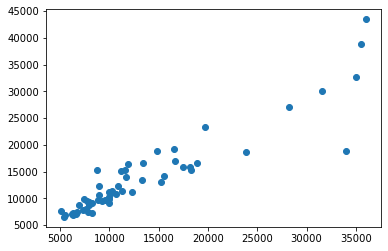

In [122]:
plt.scatter([yfinal1_test,pred],)

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


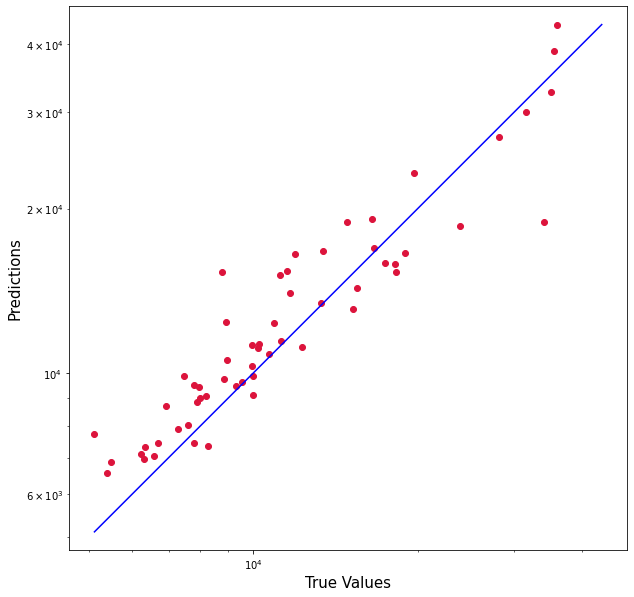

In [123]:
plt.figure(figsize=(10,10))
plt.scatter(yfinal1_test, pred, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(pred), max(yfinal1_test))
p2 = min(min(pred), min(yfinal1_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()